# Project 6: Visualizing Monetary Policy

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

<AxesSubplot: xlabel='DATE'>

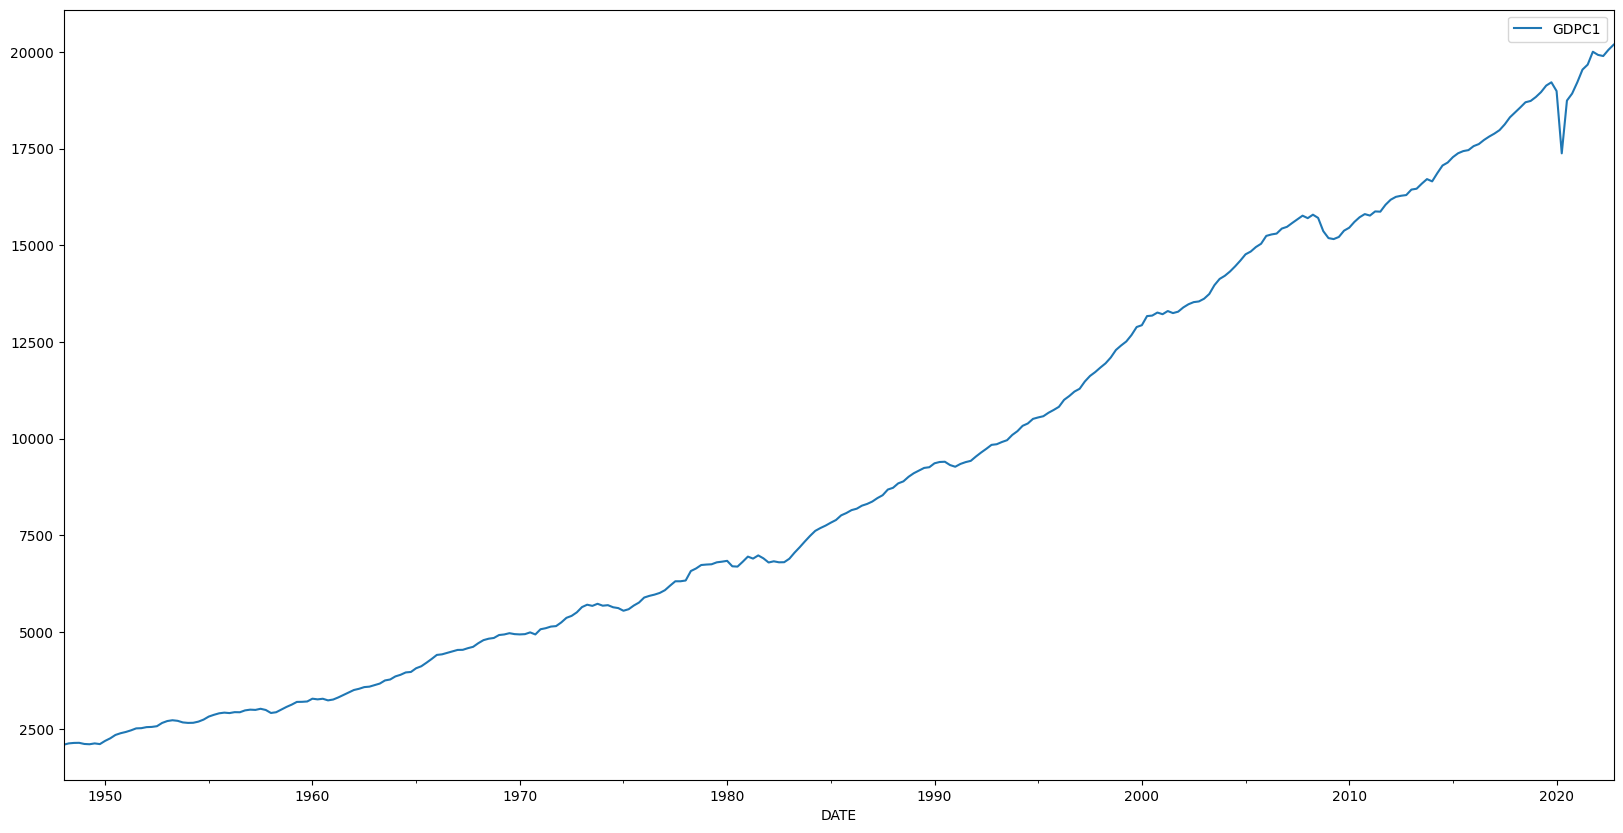

In [2]:
start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df.plot.line(figsize = (20,10))

In [3]:
def gather_data(data_codes,
                start, 
                end = datetime.datetime.today(),
                freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean() # .first() .last() .max() .median() etc are other options
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    return df

In [4]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start,
                   end = end,
                   freq = "W")
data

Base: Total  Base: Currency in Circulation
DATE                                                  
2002-01-06     659930.0                        643.044
2002-01-13     659930.0                        638.956
2002-01-20     652179.0                        632.719
2002-01-27     652179.0                        632.017
2002-02-03     649587.0                        630.409
...                 ...                            ...
2020-08-16    4750981.0                       2003.019
2020-08-23    4830999.0                       2007.458
2020-08-30    4830999.0                       2010.991
2020-09-06    4876690.0                       2016.895
2020-09-13    4876690.0                       2026.998

[976 rows x 2 columns]

In [5]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"] * 1000

<AxesSubplot: xlabel='DATE'>

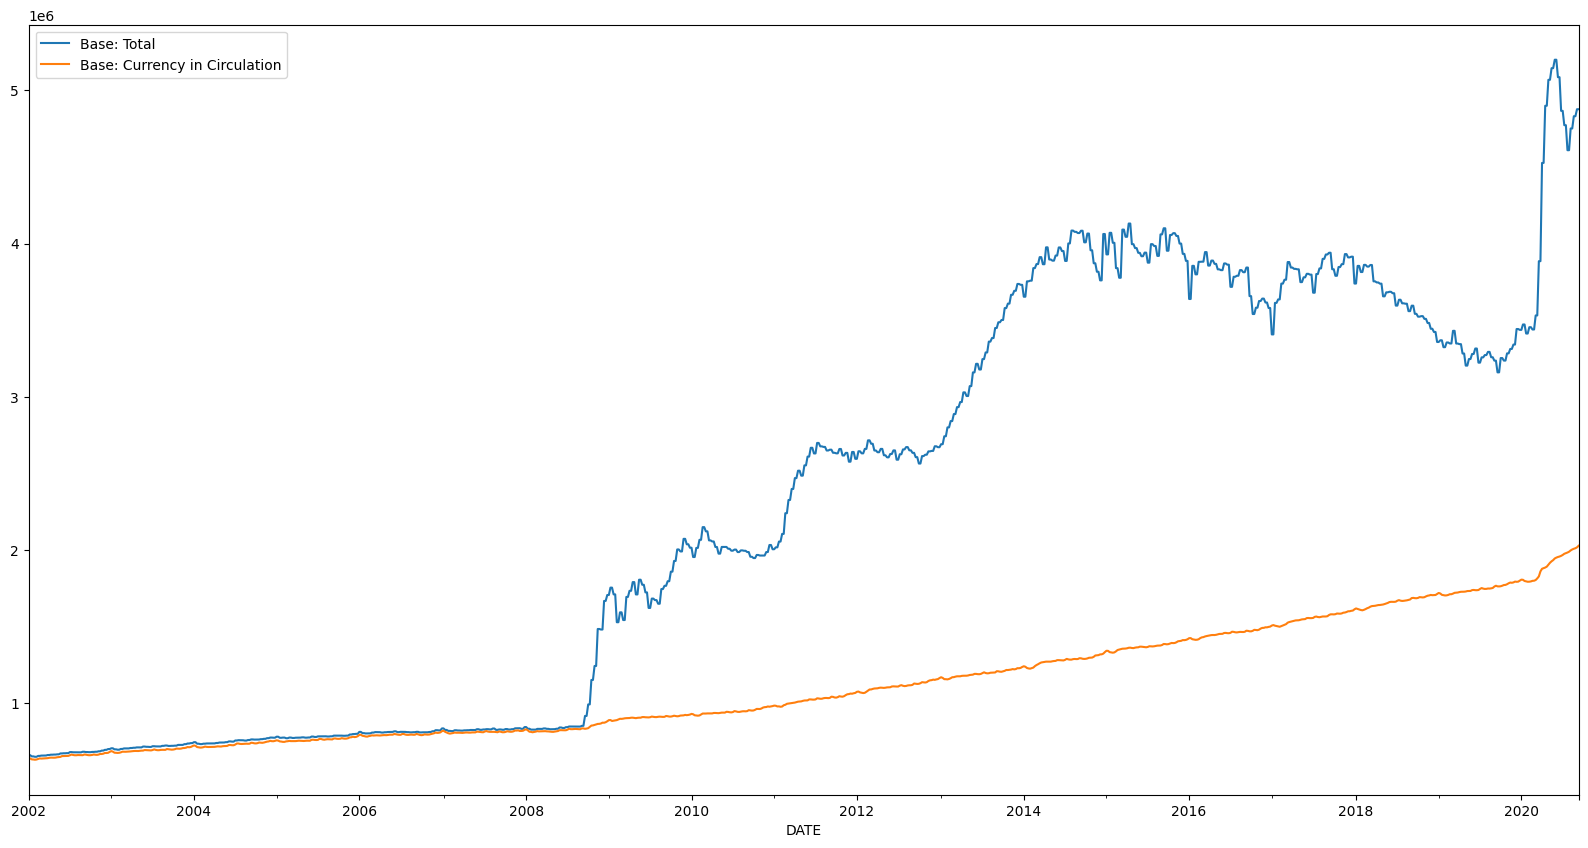

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

<AxesSubplot: xlabel='DATE'>

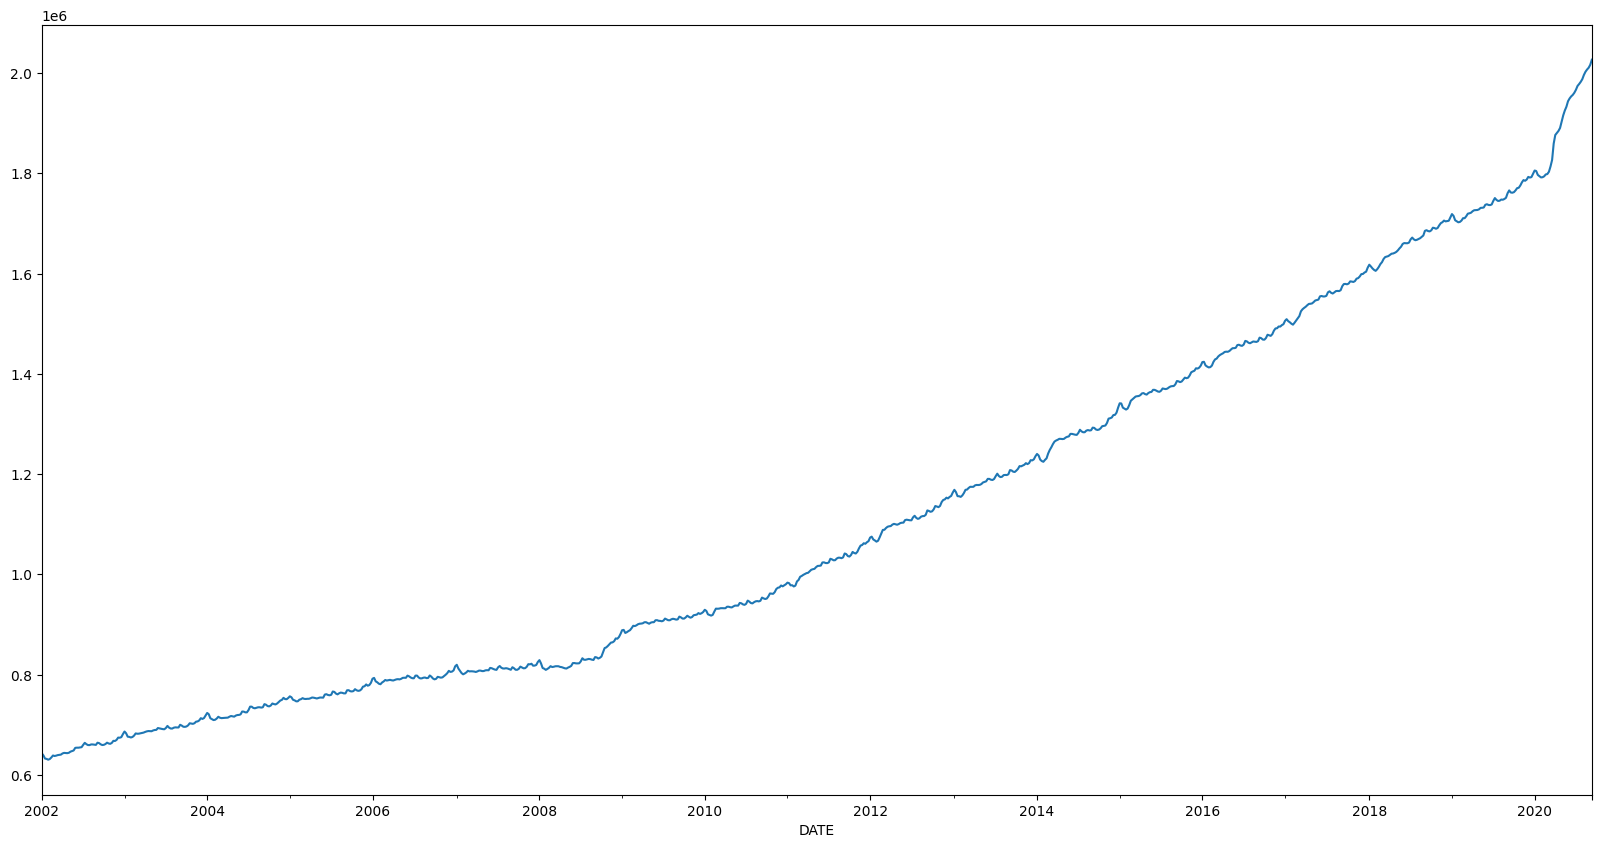

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(ax = ax)

In [8]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

In [9]:
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "M")
data.to_csv("monetary.csv")

In [10]:
#data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(data[])
data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]

Interest on Reserve Balances  Interest on Excess Reserves
DATE                                                                 
2002-01-31                           NaN                          NaN
2002-02-28                           NaN                          NaN
2002-03-31                           NaN                          NaN
2002-04-30                           NaN                          NaN
2002-05-31                           NaN                          NaN
...                                  ...                          ...
2022-09-30                      2.625000                          NaN
2022-10-31                      3.150000                          NaN
2022-11-30                      3.850000                          NaN
2022-12-31                      4.174194                          NaN
2023-01-31                      4.400000                          NaN

[253 rows x 2 columns]

In [11]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match_date = match.index
match_val = match.sum(axis=1) / 2
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis=1)
plot_data.loc[match_date] = match_val

<AxesSubplot: xlabel='DATE'>

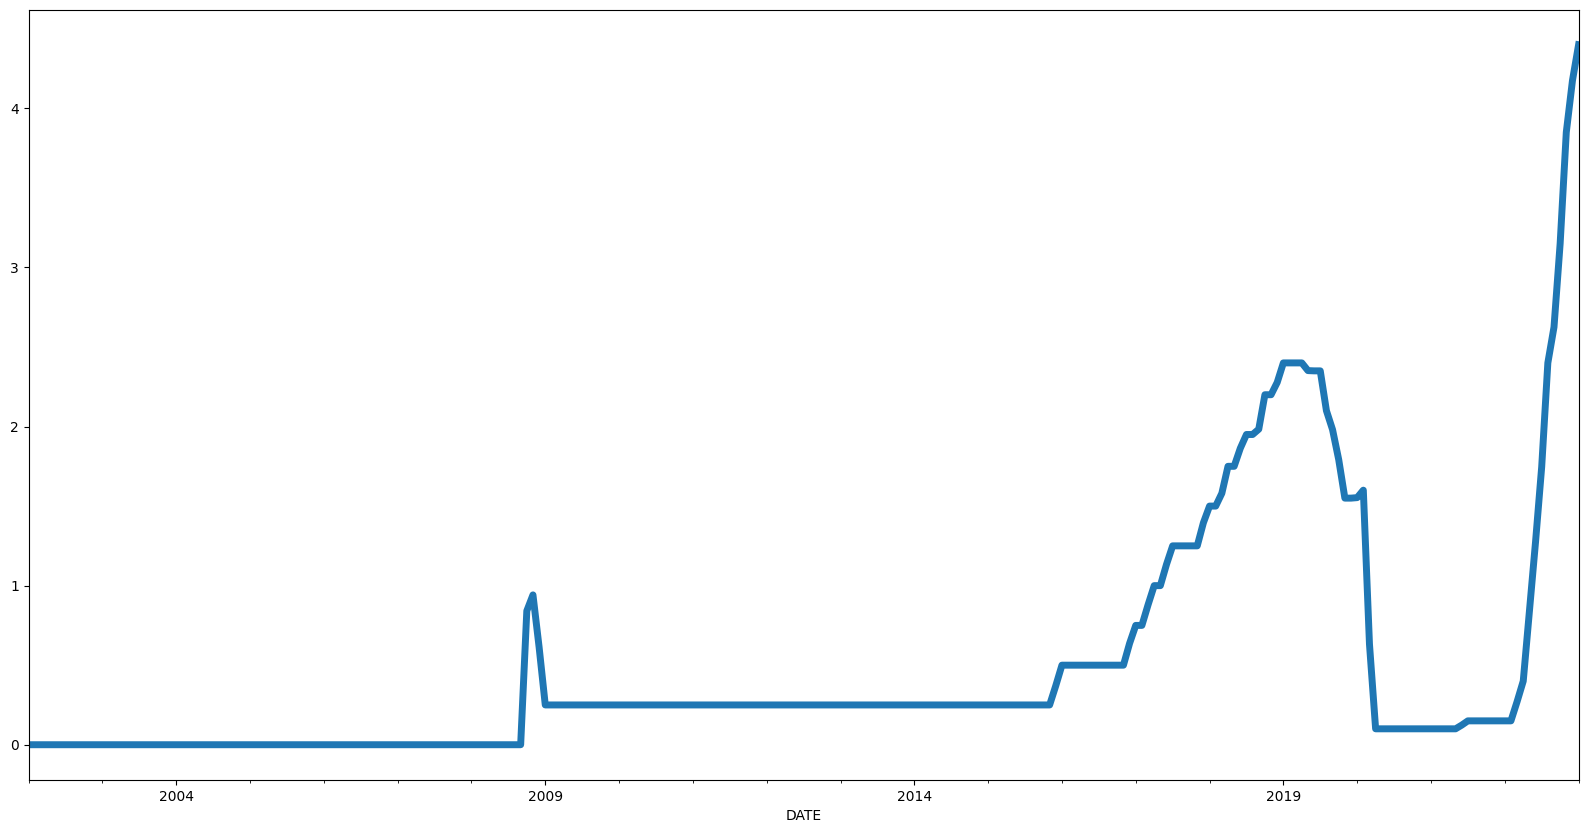

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.line(linewidth = 5, ax = ax)

## Build function to plot lines of data in data frame

In [13]:
from matplotlib.backends.backend_pdf import PdfPages
import os

In [14]:
def plot_lines(df,
              linewidth = 5,
              figsize = (40, 20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
              global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length = 0, which = "both")
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    if save_fig:
        try:
            os.mkdir("Monetary Plots")
        except:
            pass
        plt.savefig("Monetary Plots/" + filename[:50] + "line.png",
                   bbox_inches = "tight")
        if pp != None: pp.savefig(fig, bbox_inches = "tight")
    
    return fig, ax

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1034293577.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%')]

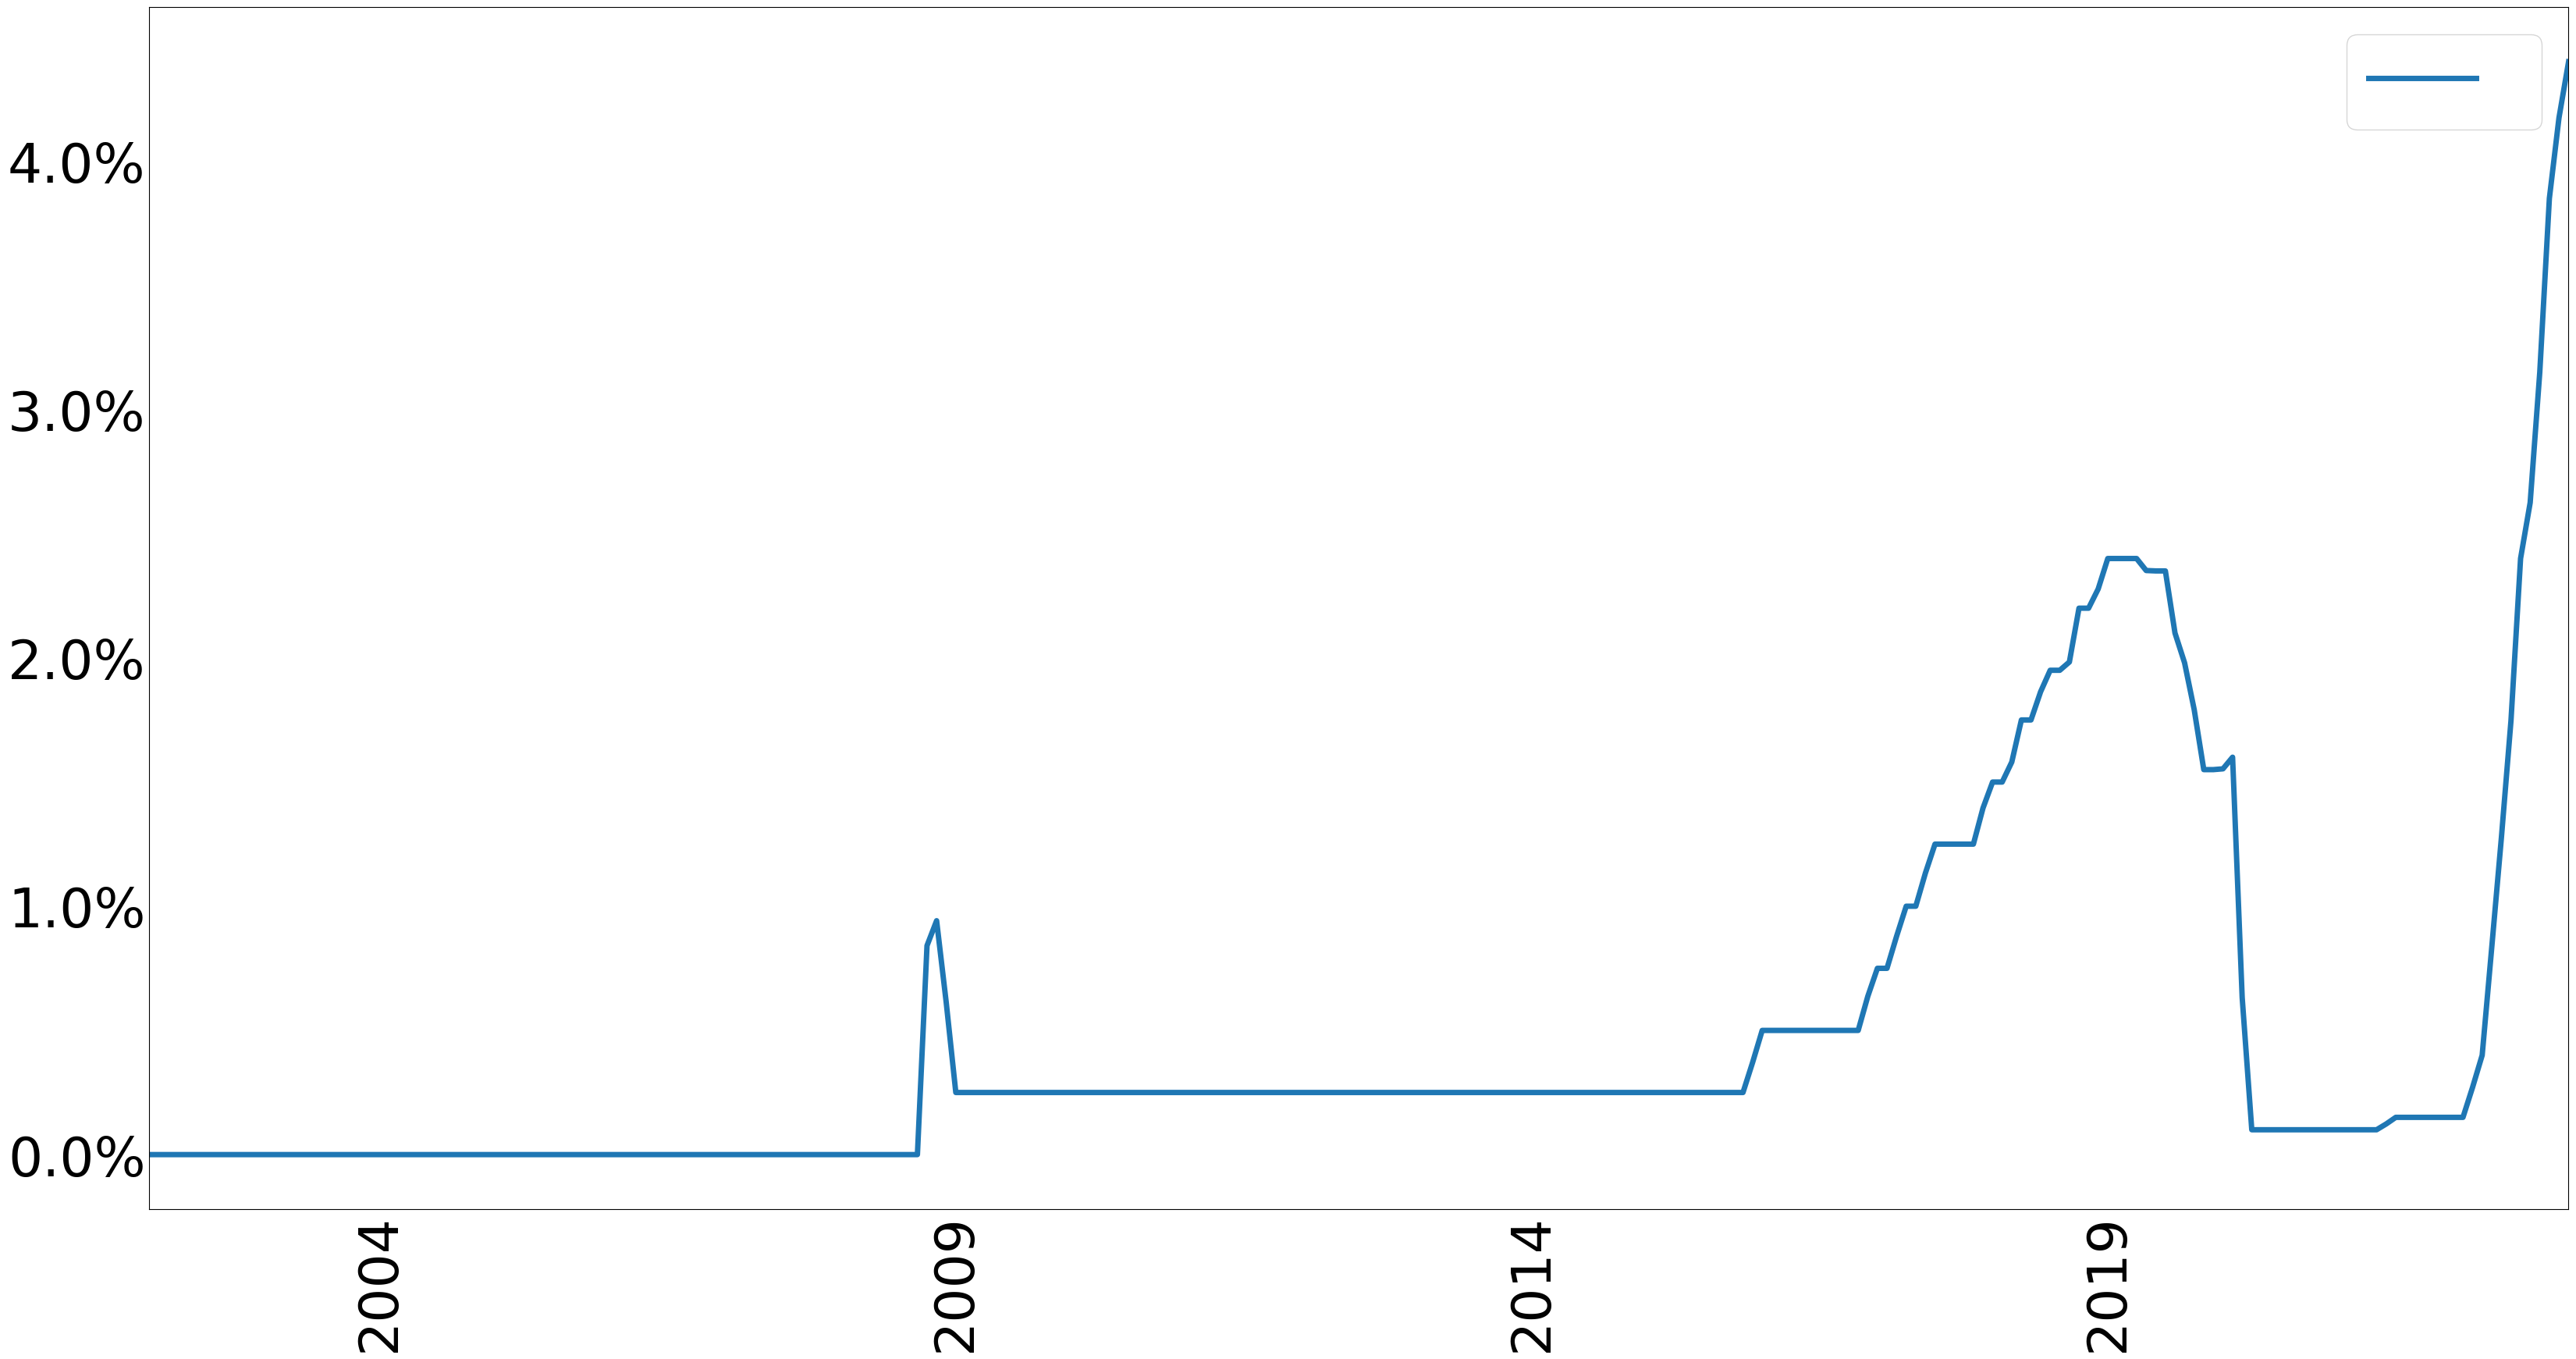

In [15]:
fig, ax = plot_lines(plot_data, save_fig=True)
ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: >)

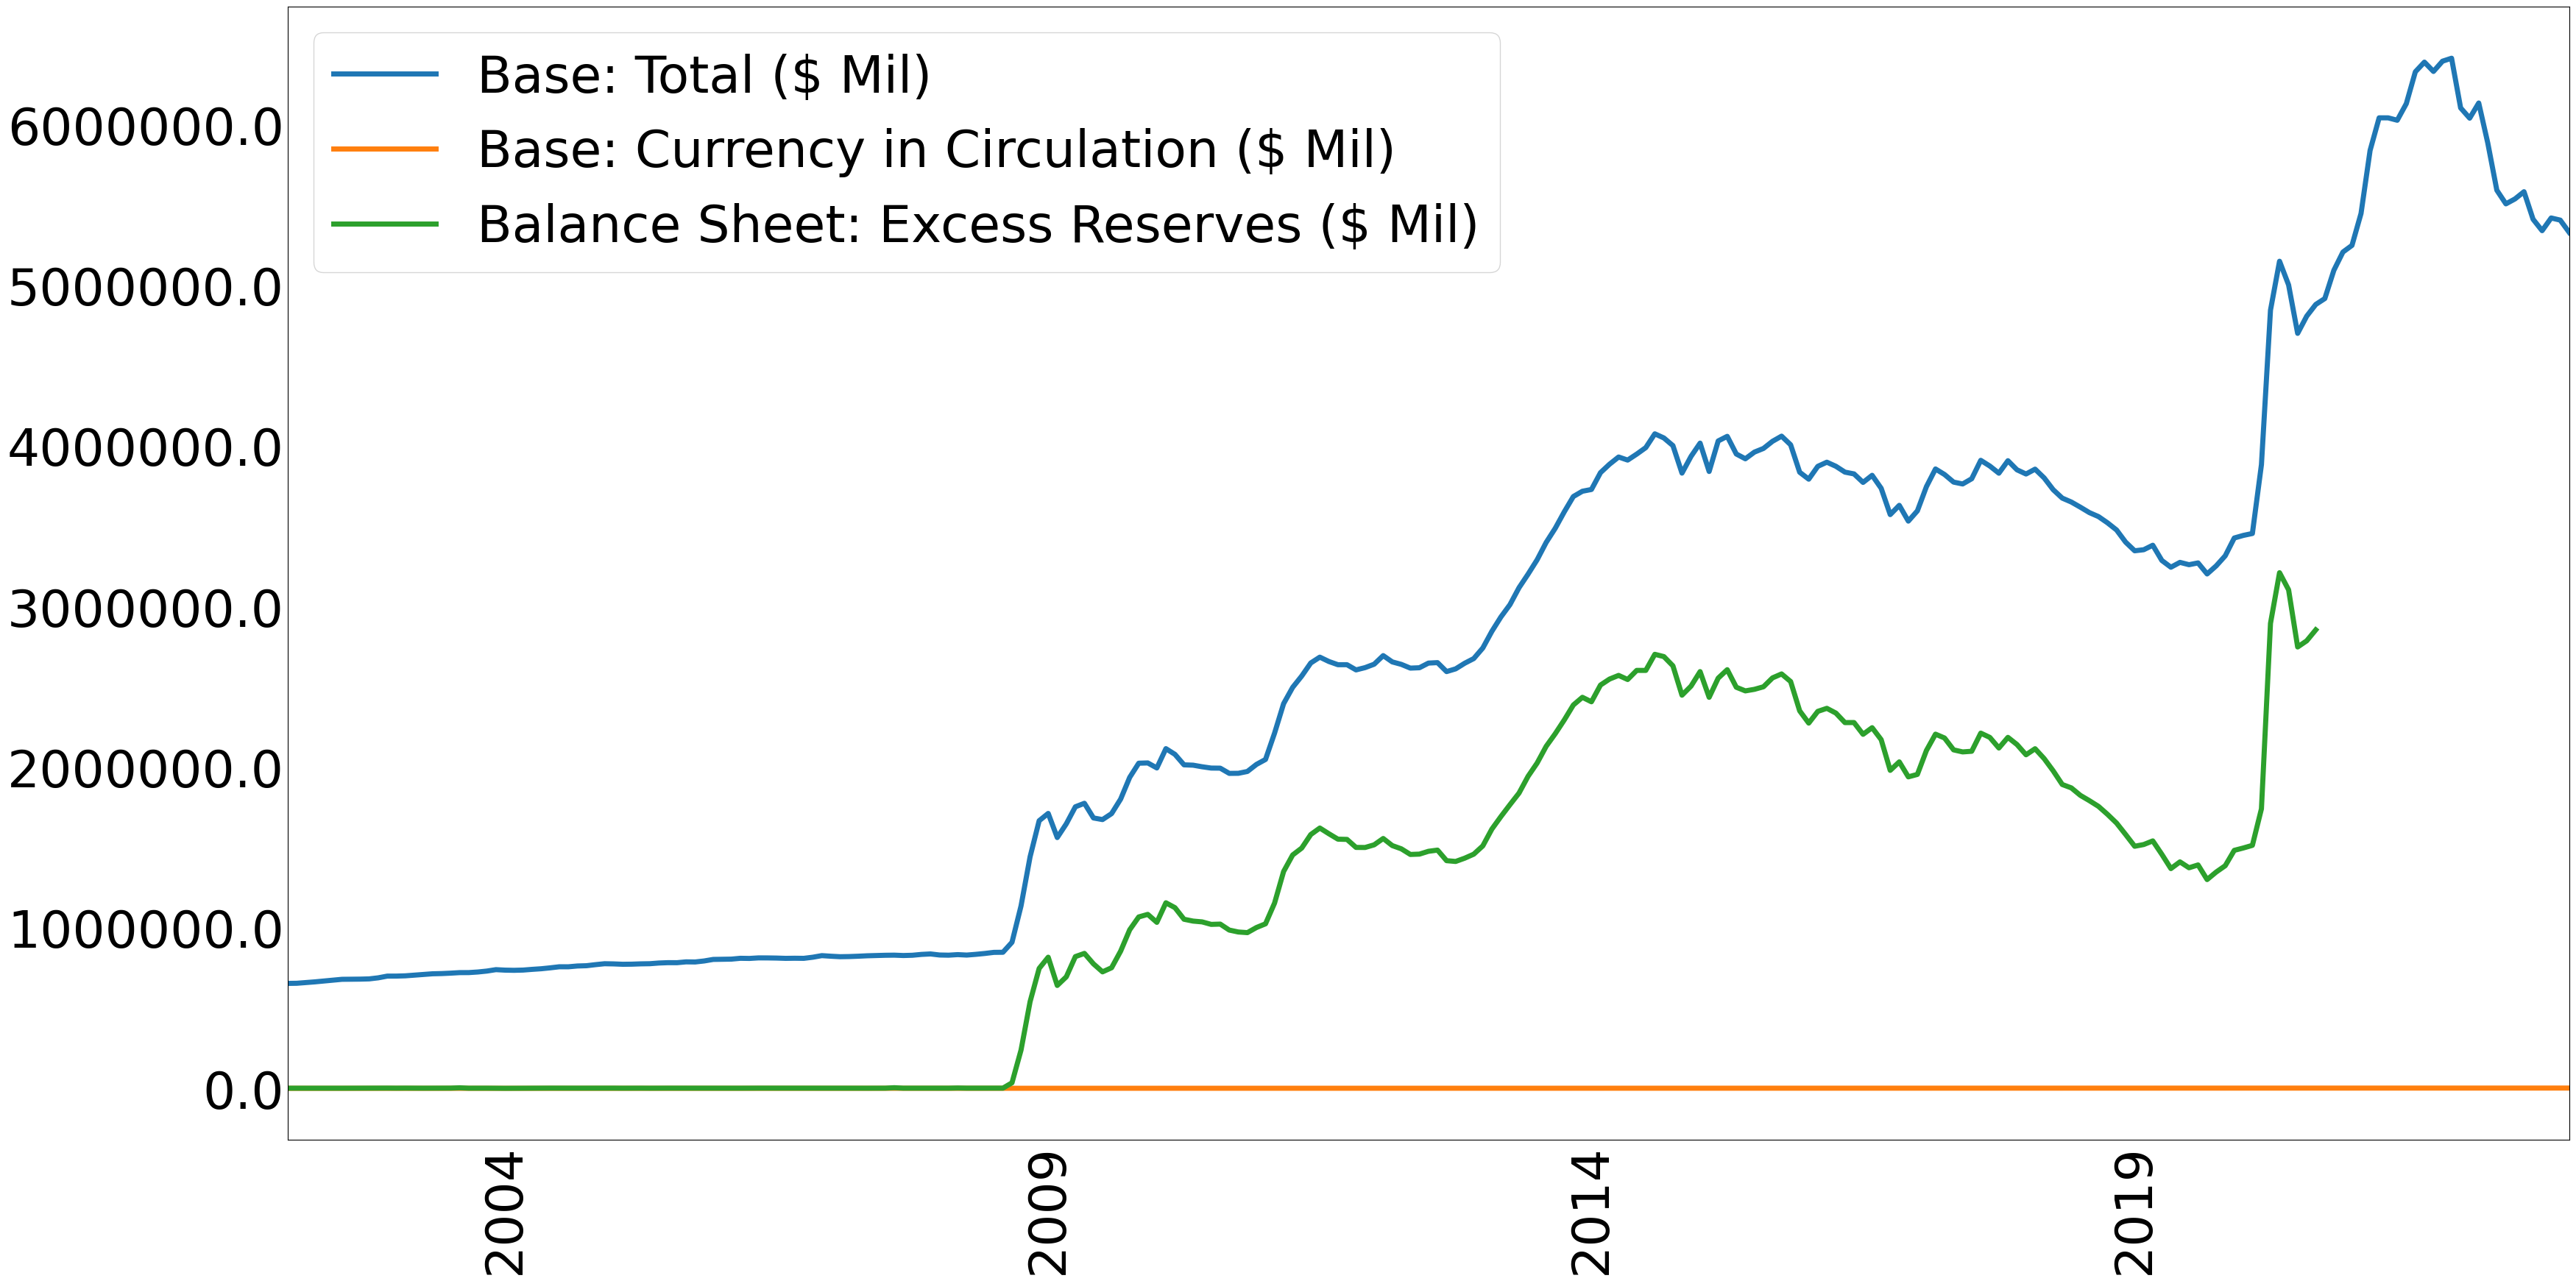

In [16]:
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_lines(plot_data, linewidth = 5, figsize = (40, 20), pp = None)

In [17]:
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key] * 1000

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: >)

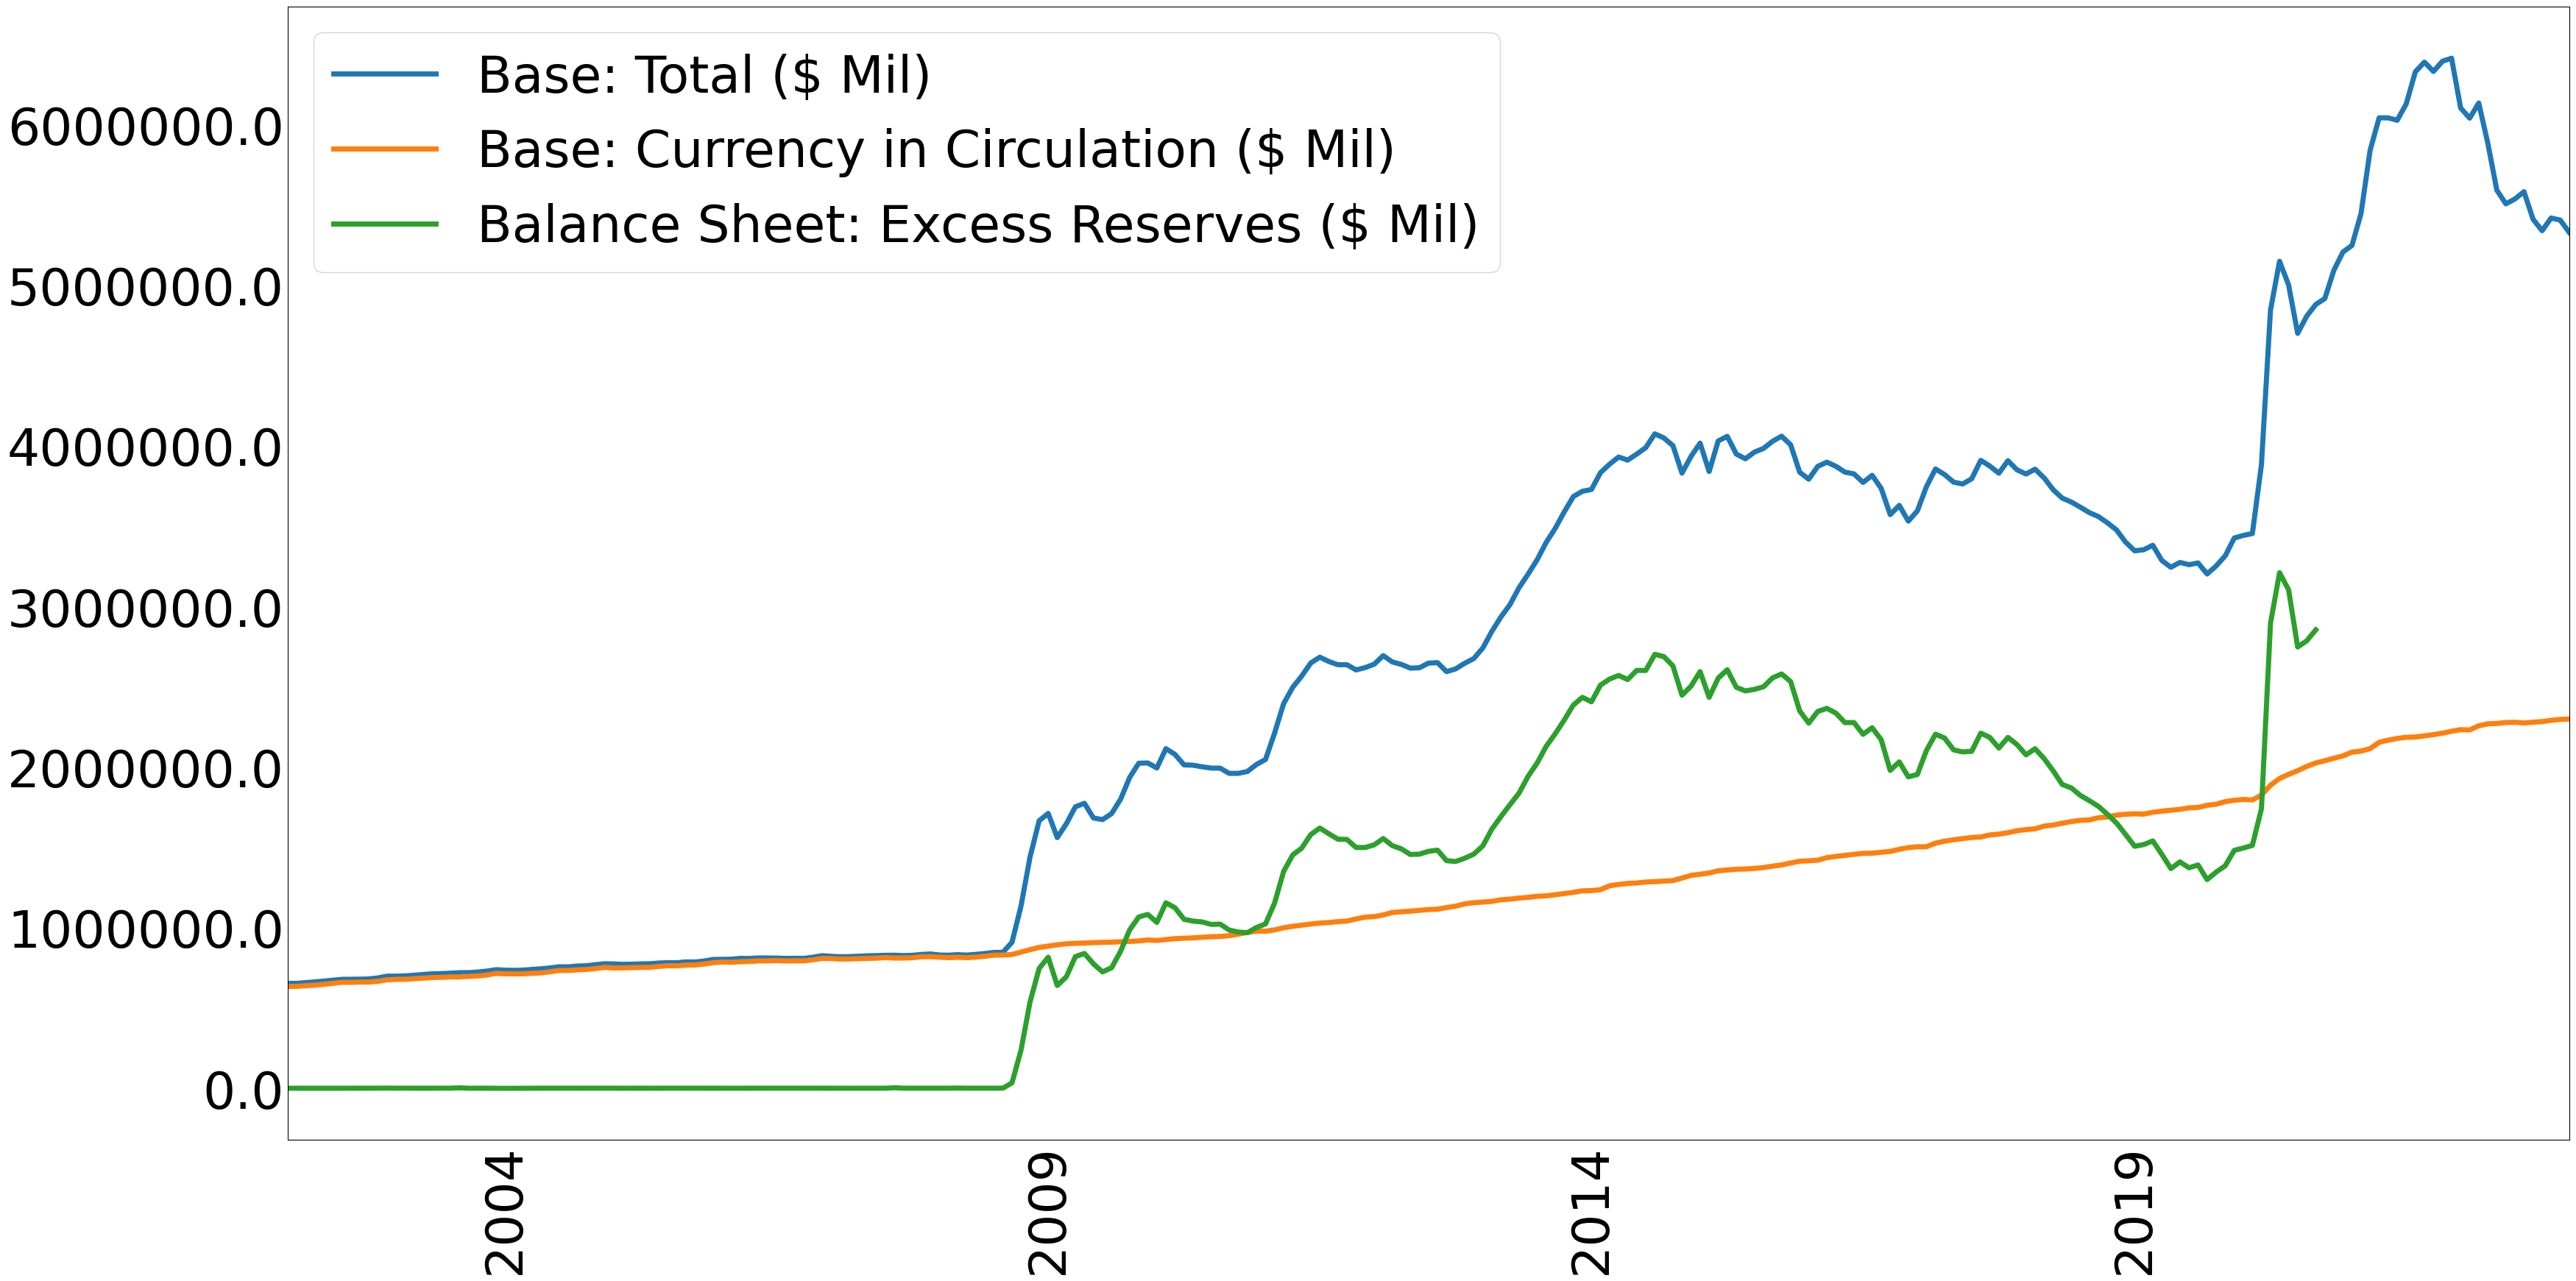

In [18]:
plot_data = data[money_vars]
plot_lines(plot_data, linewidth = 5, figsize = (40, 20), pp = None)

## Stack Lines

In [19]:
def plot_stacked(df,
                stack_vars,
                linewidth = 1,
                figsize = (40,20),
                pp = None,
                total_var = False,
                global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth,
            ax = ax,
            c = "k",
            label = total_var,
            ls = "--")
    ax.legend(loc = 2, ncol = 2)
    plt.xticks(rotation = 90)
    df[stack_vars].plot.area(stacked = True,
                           linewidth = 0,
                           ax = ax)
    
    return fig, ax

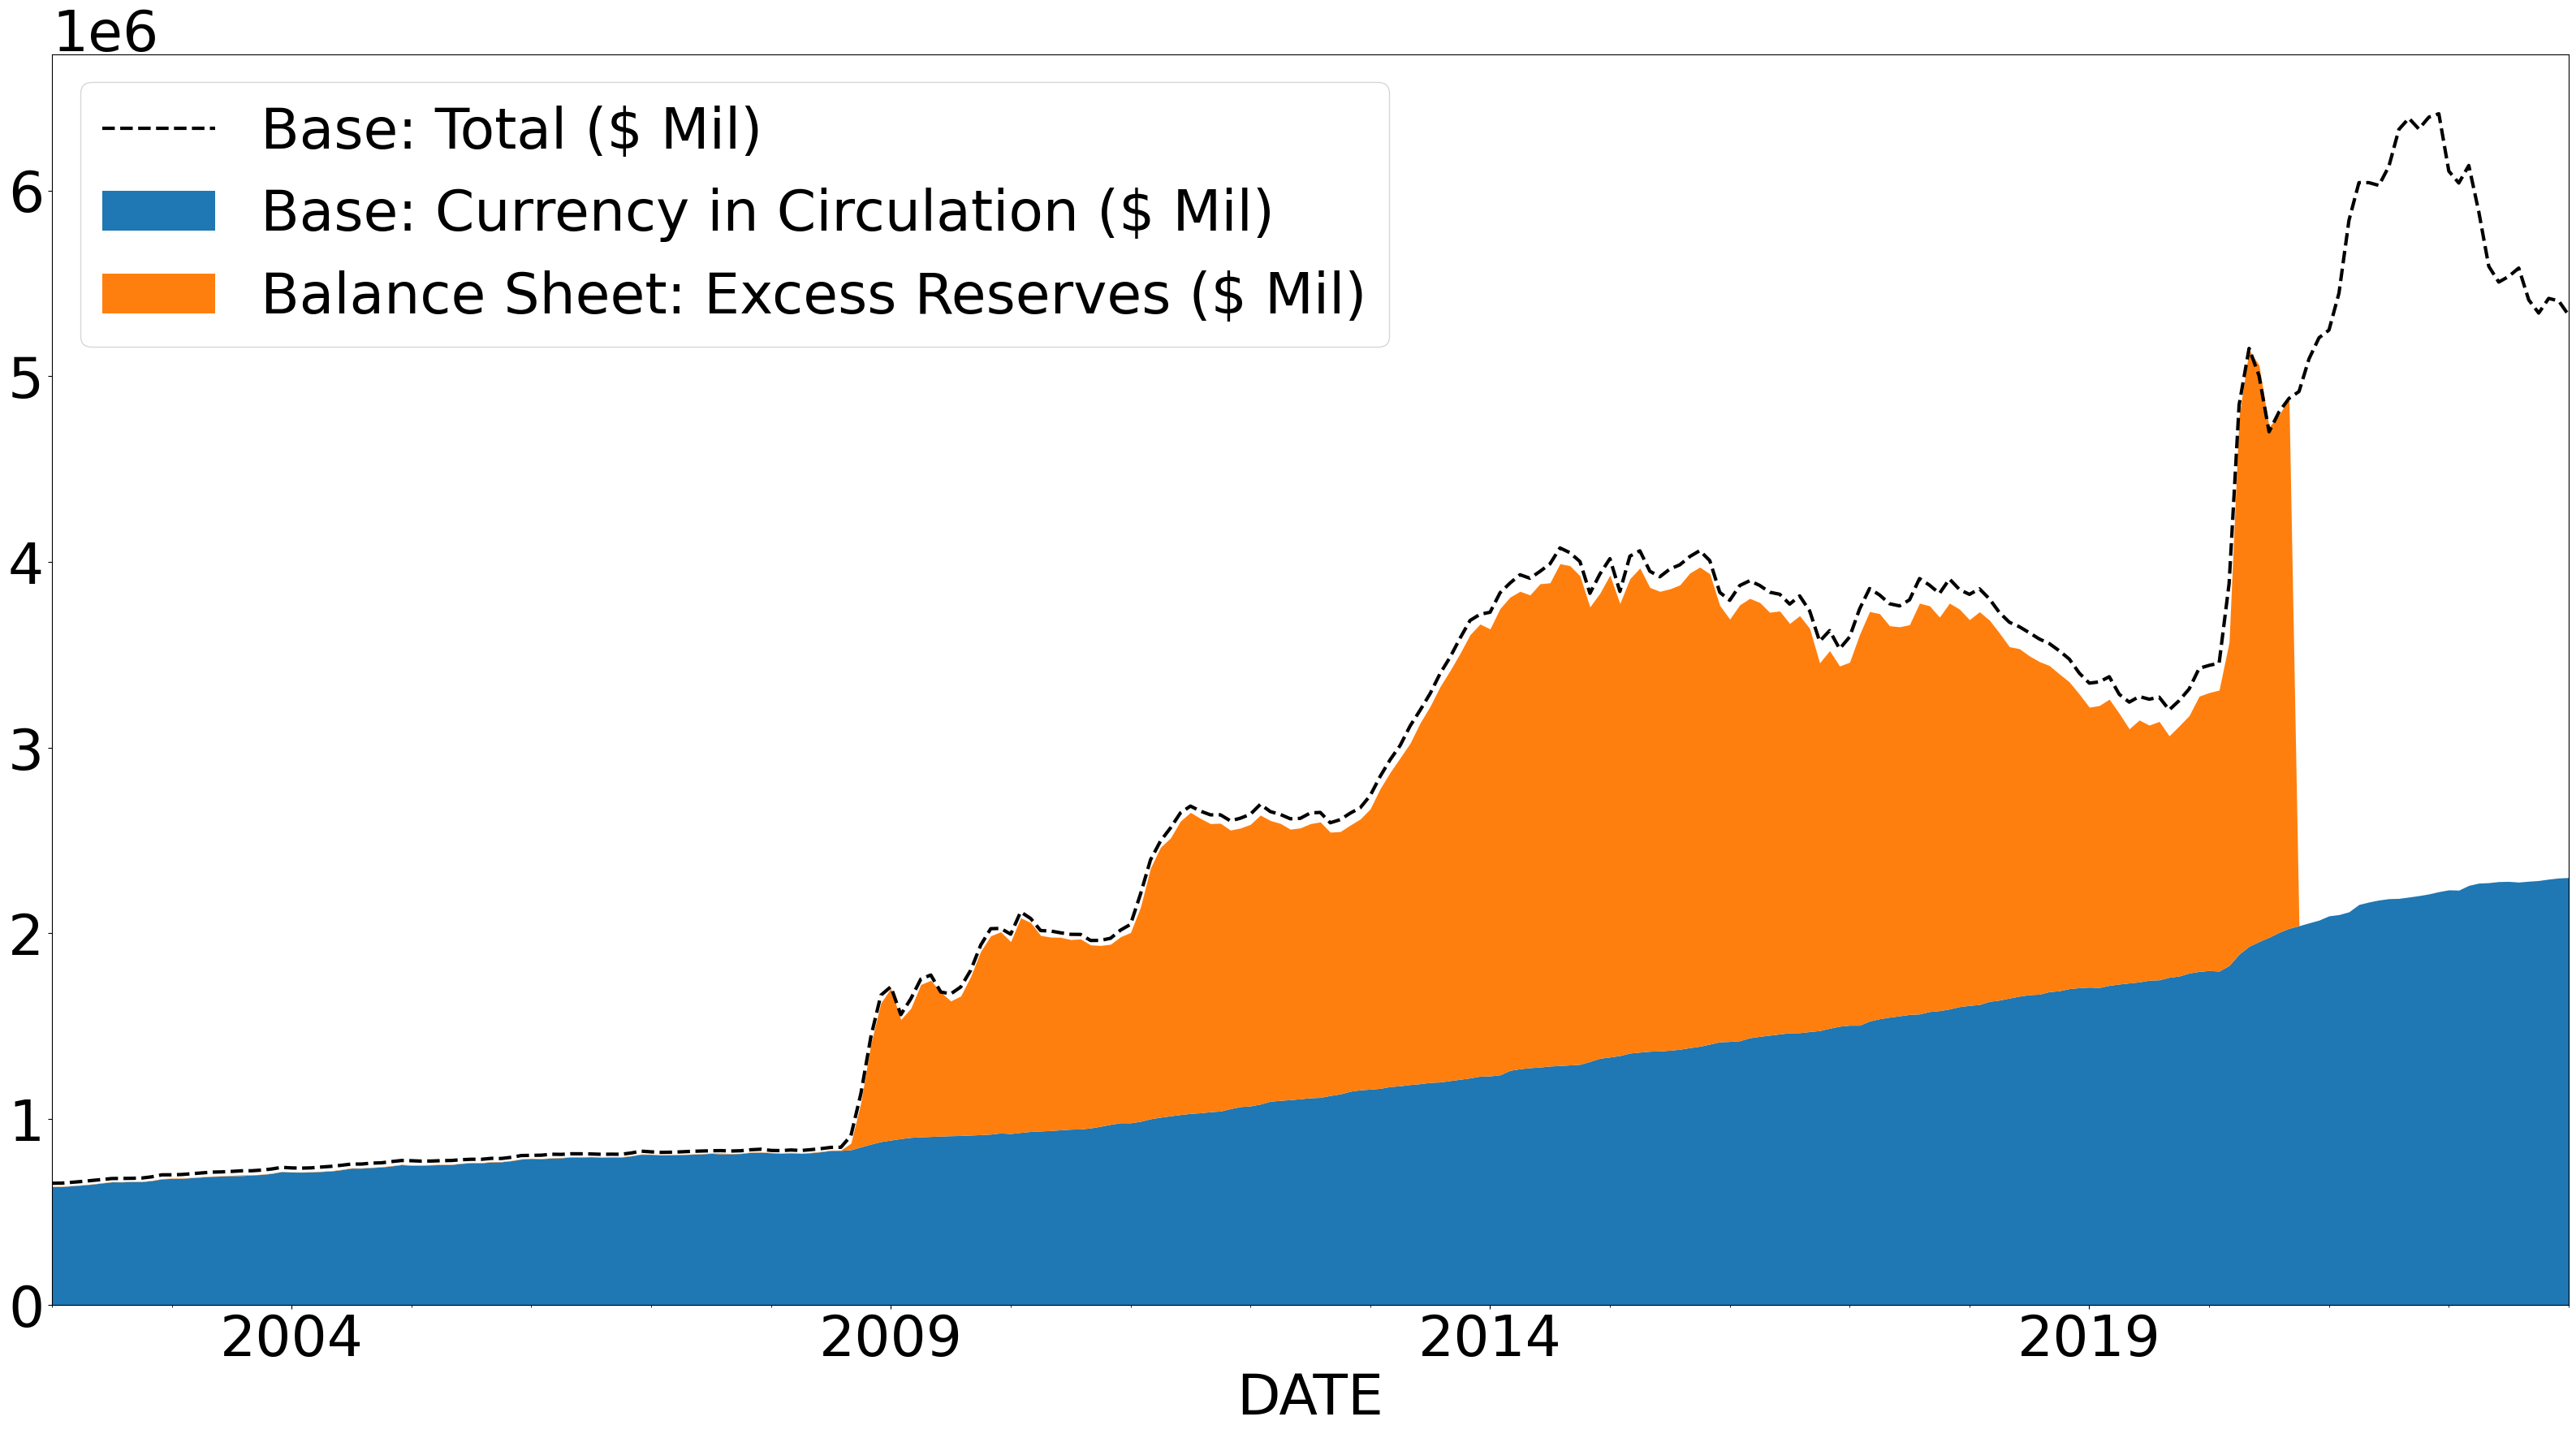

In [20]:
stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(data, stack_vars, 
                       total_var = total_var,
                      linewidth = 3)

In [21]:
money_vars

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)']

In [22]:
money_vars = money_vars + ["Balance Sheet: Required Reserves ($ Mil)"]

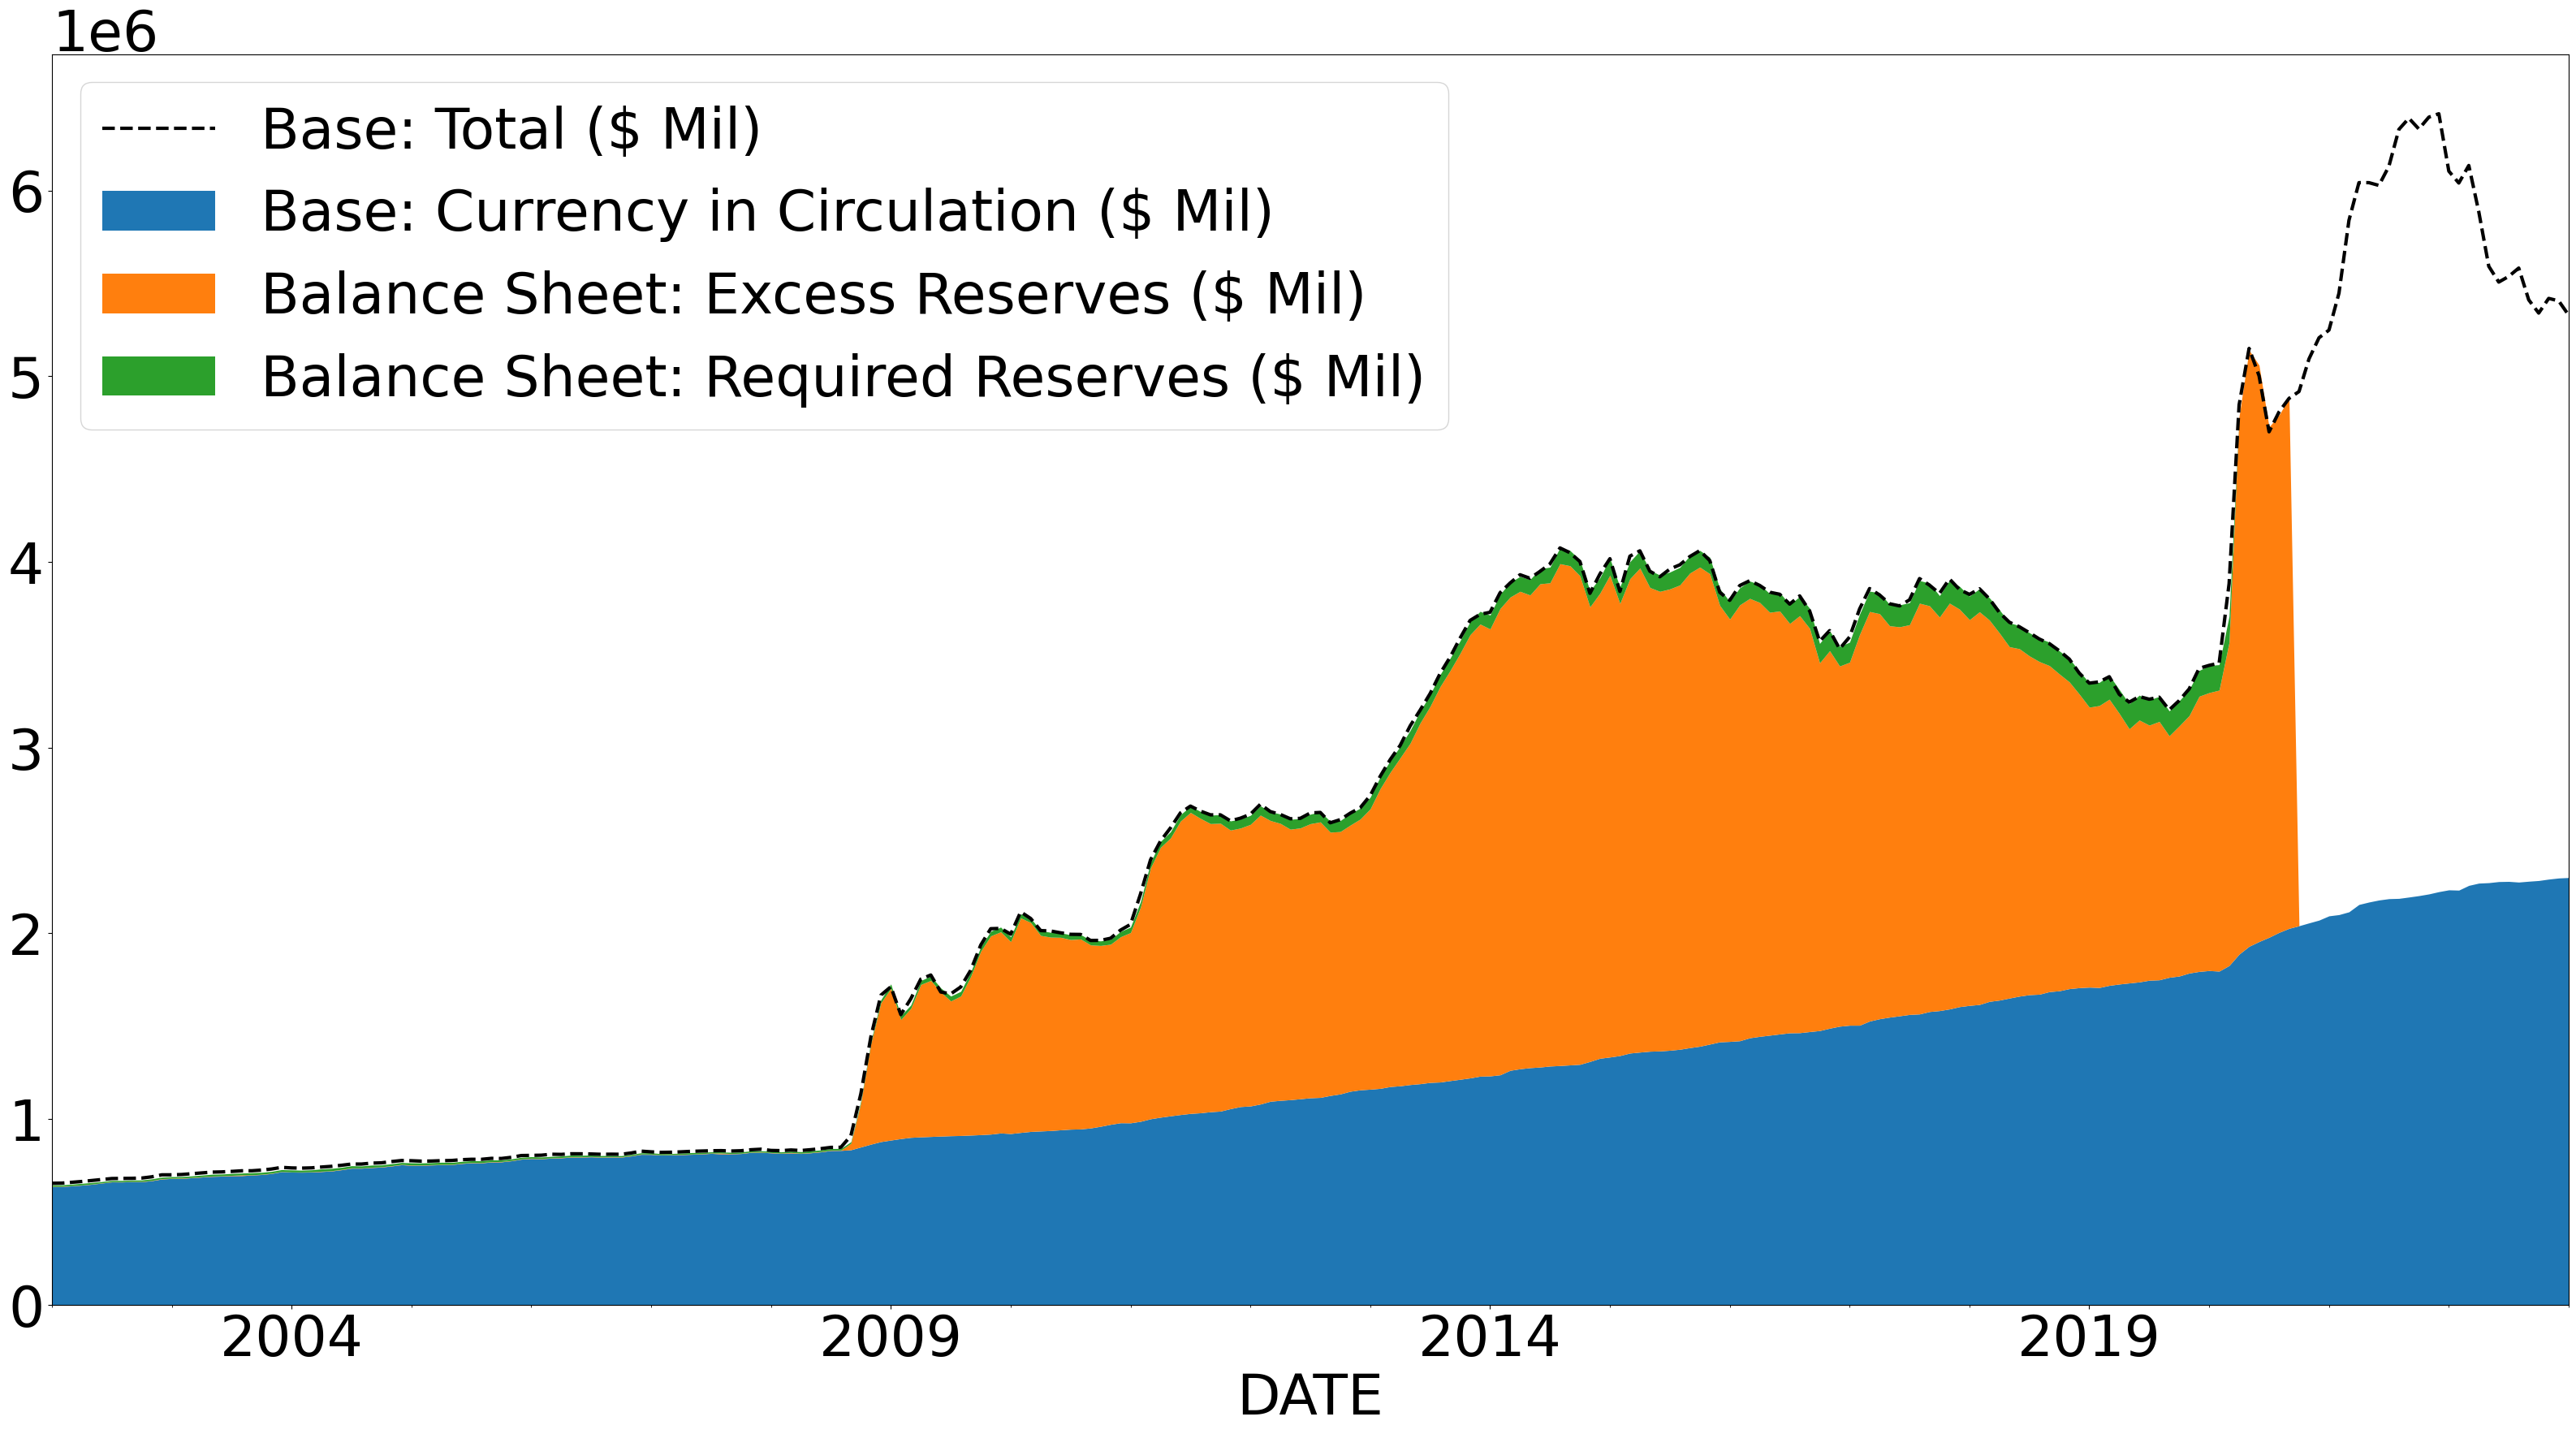

In [23]:
stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(data, stack_vars, 
                       total_var = total_var,
                      linewidth = 3)

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

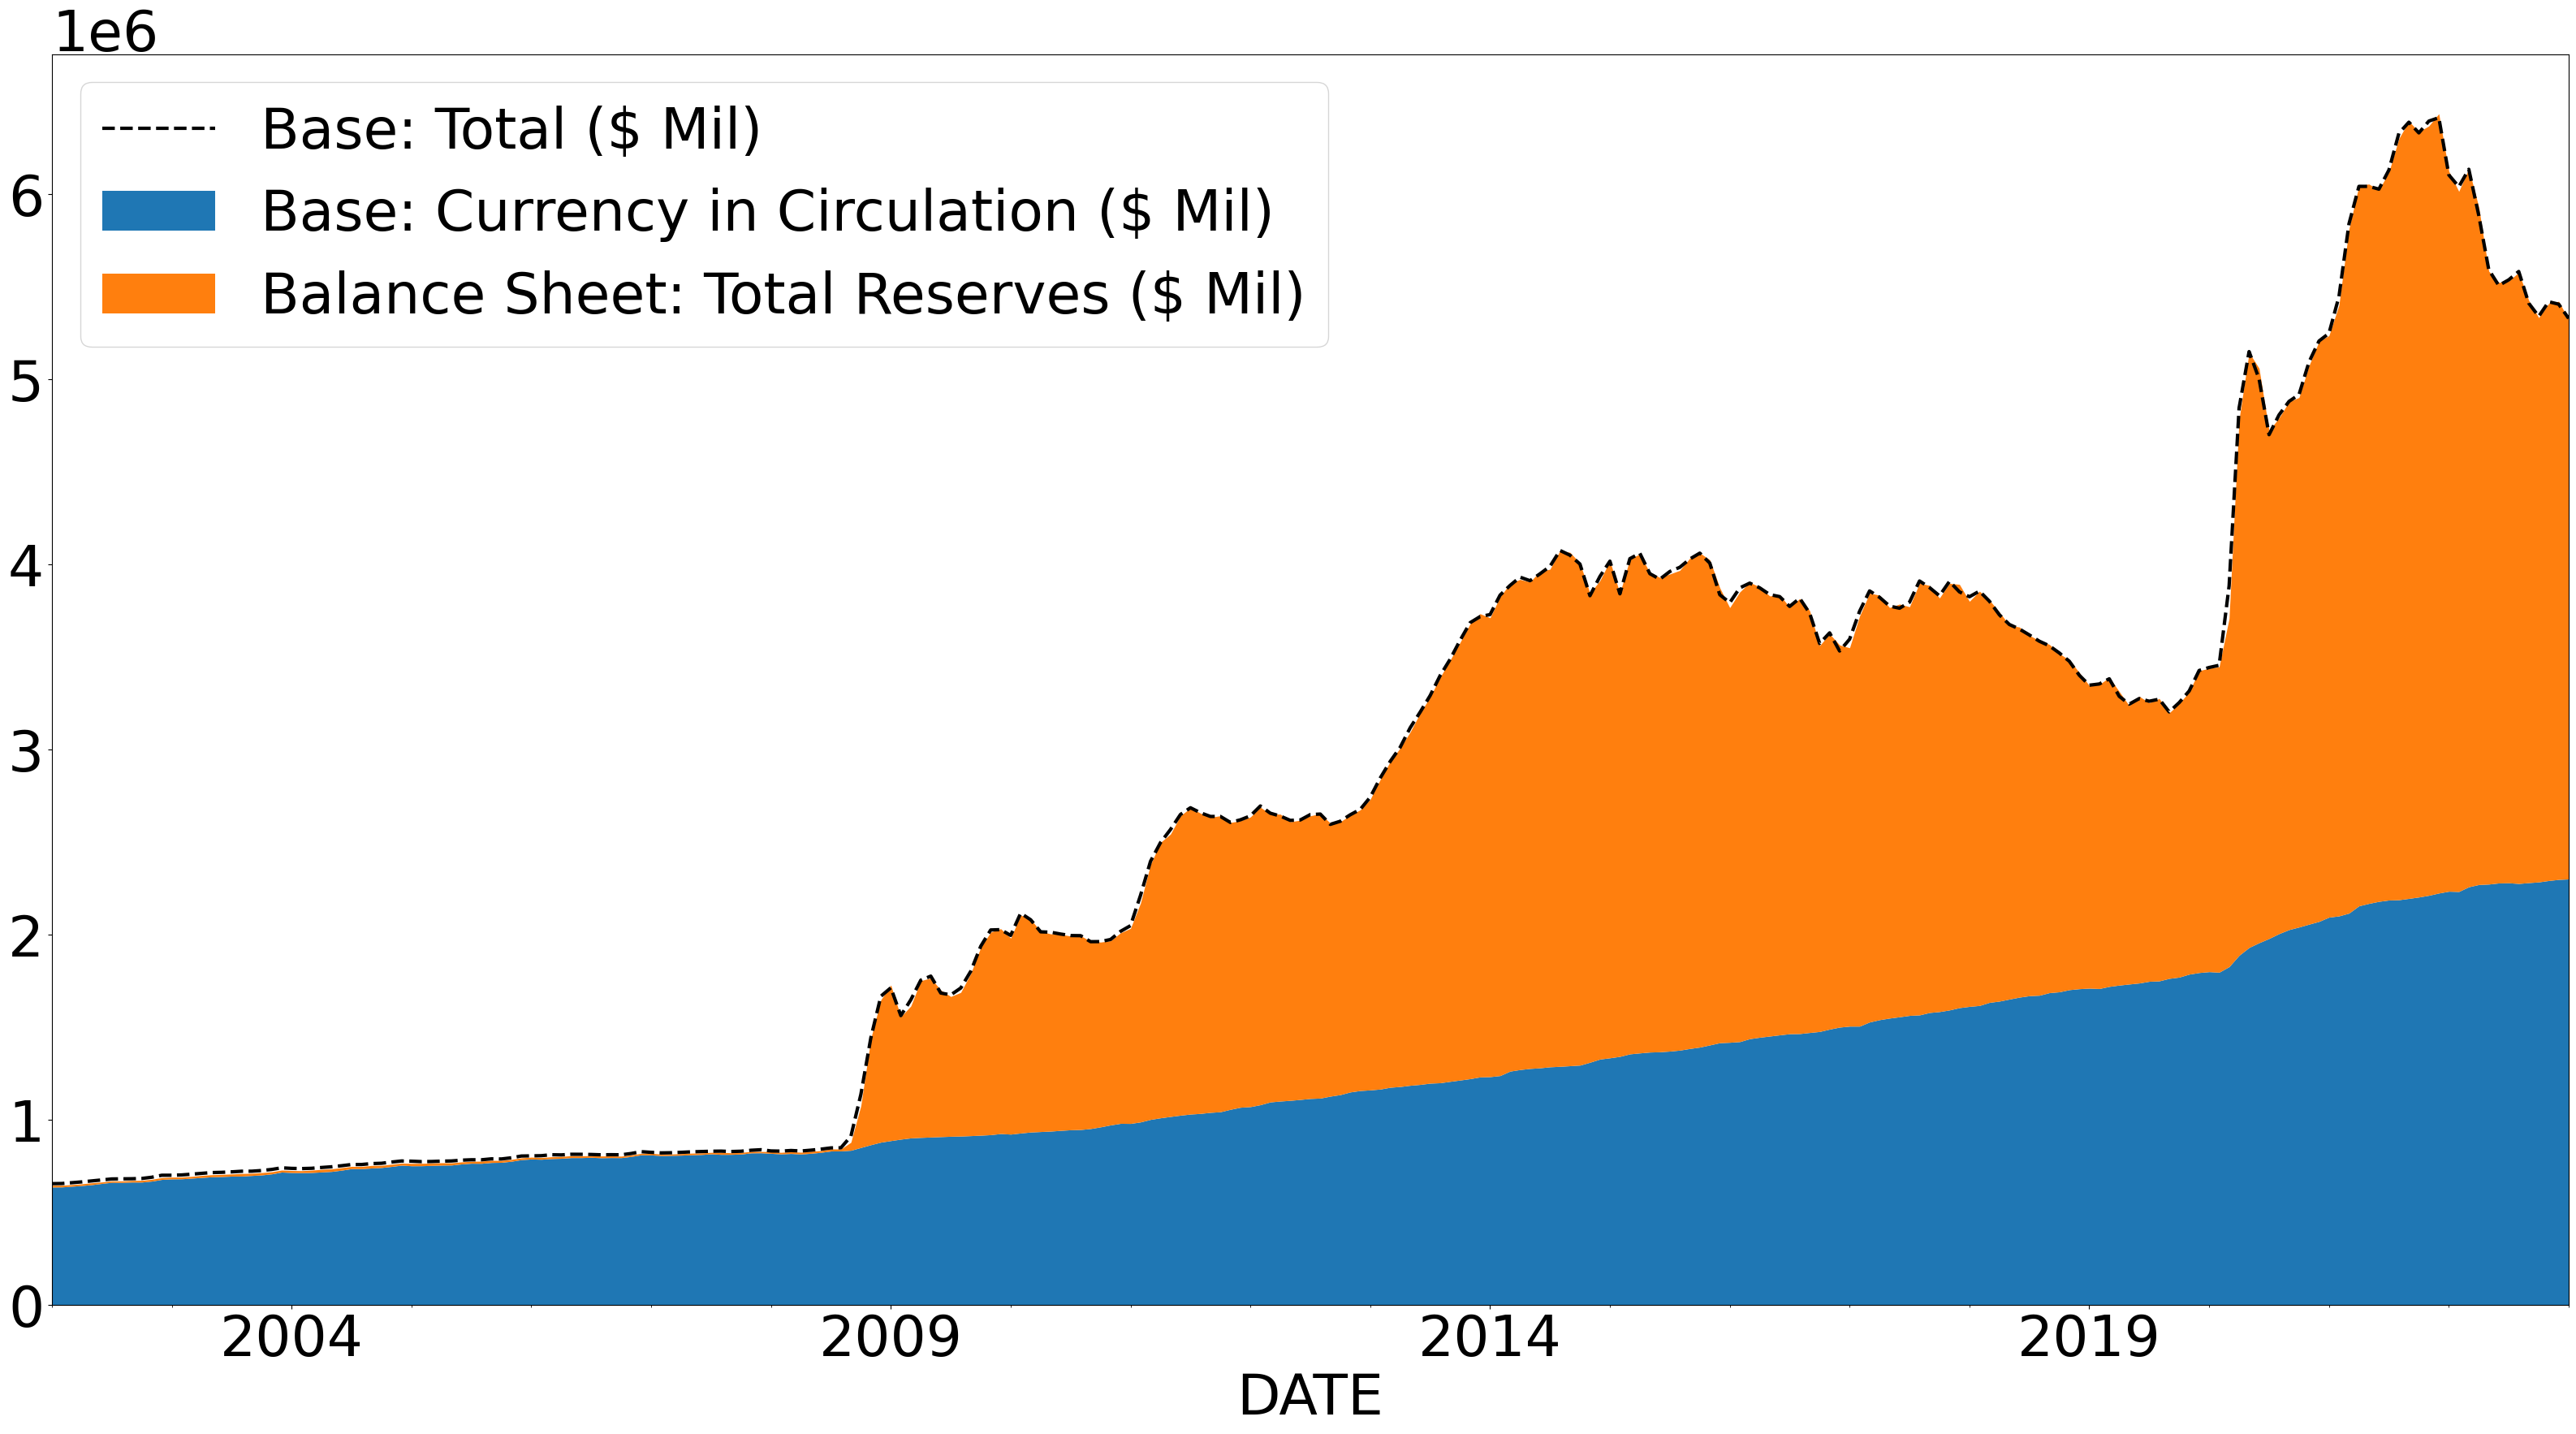

In [24]:
stack_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
plot_stacked(data, stack_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: >)

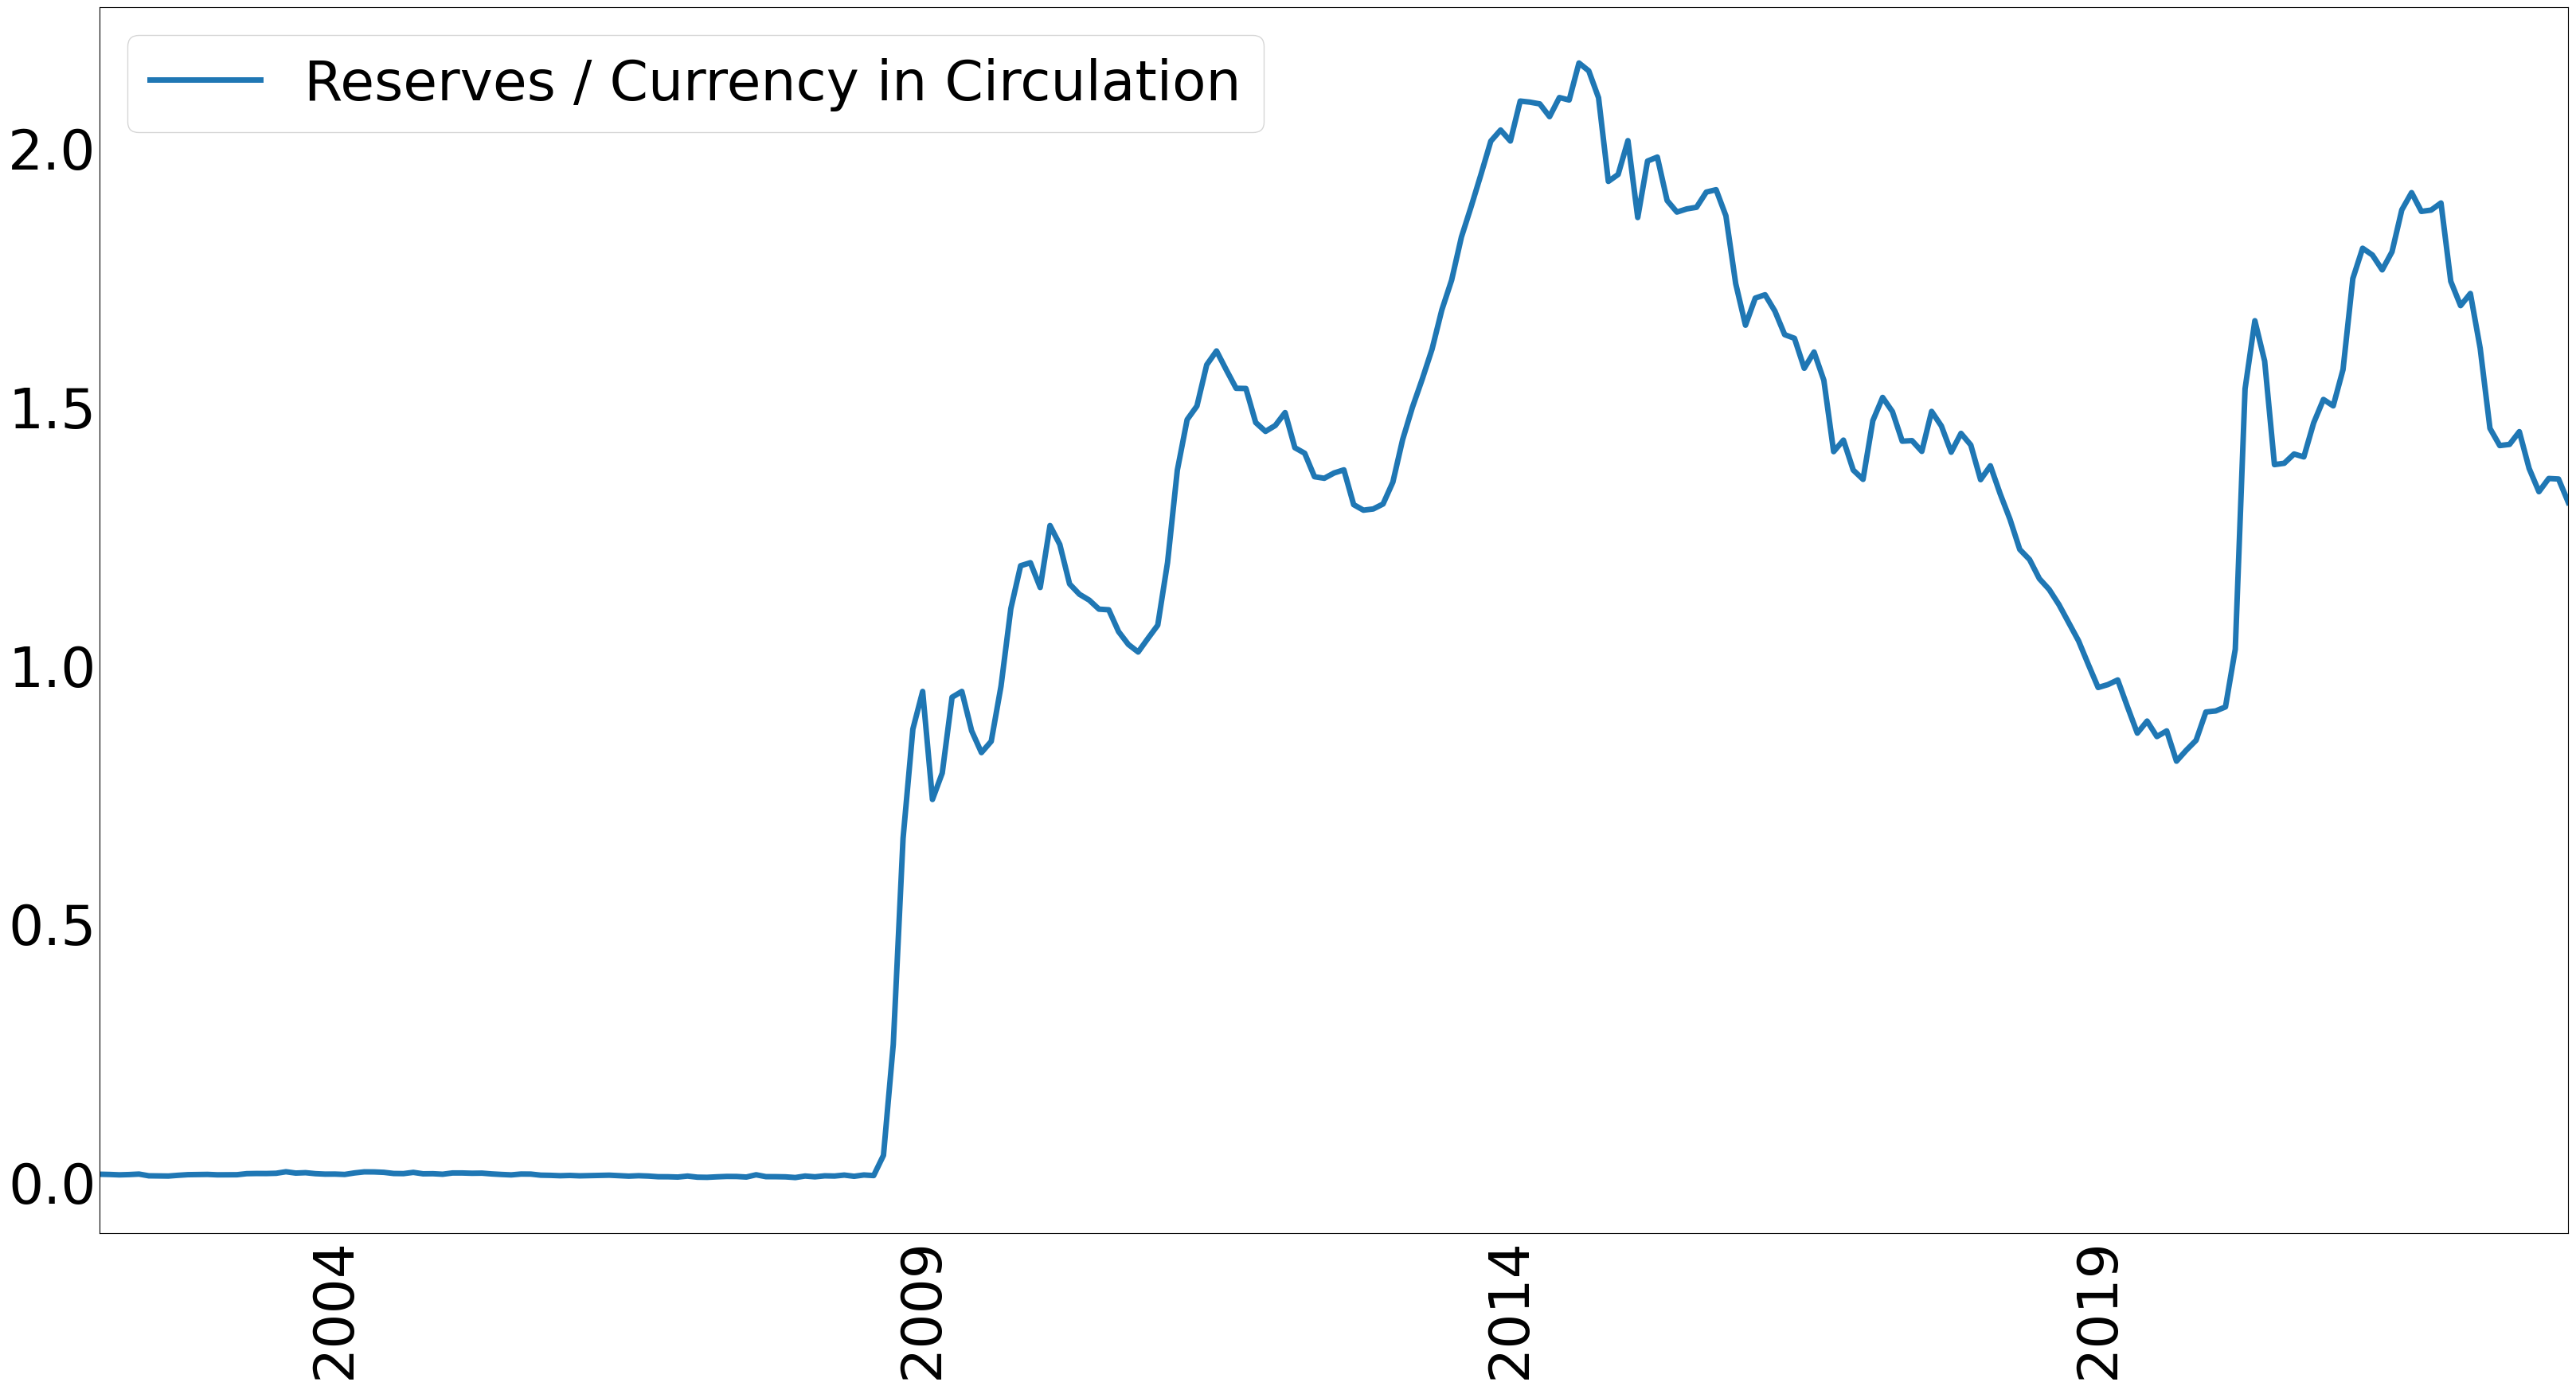

In [25]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_lines(data[reserve_vars])





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

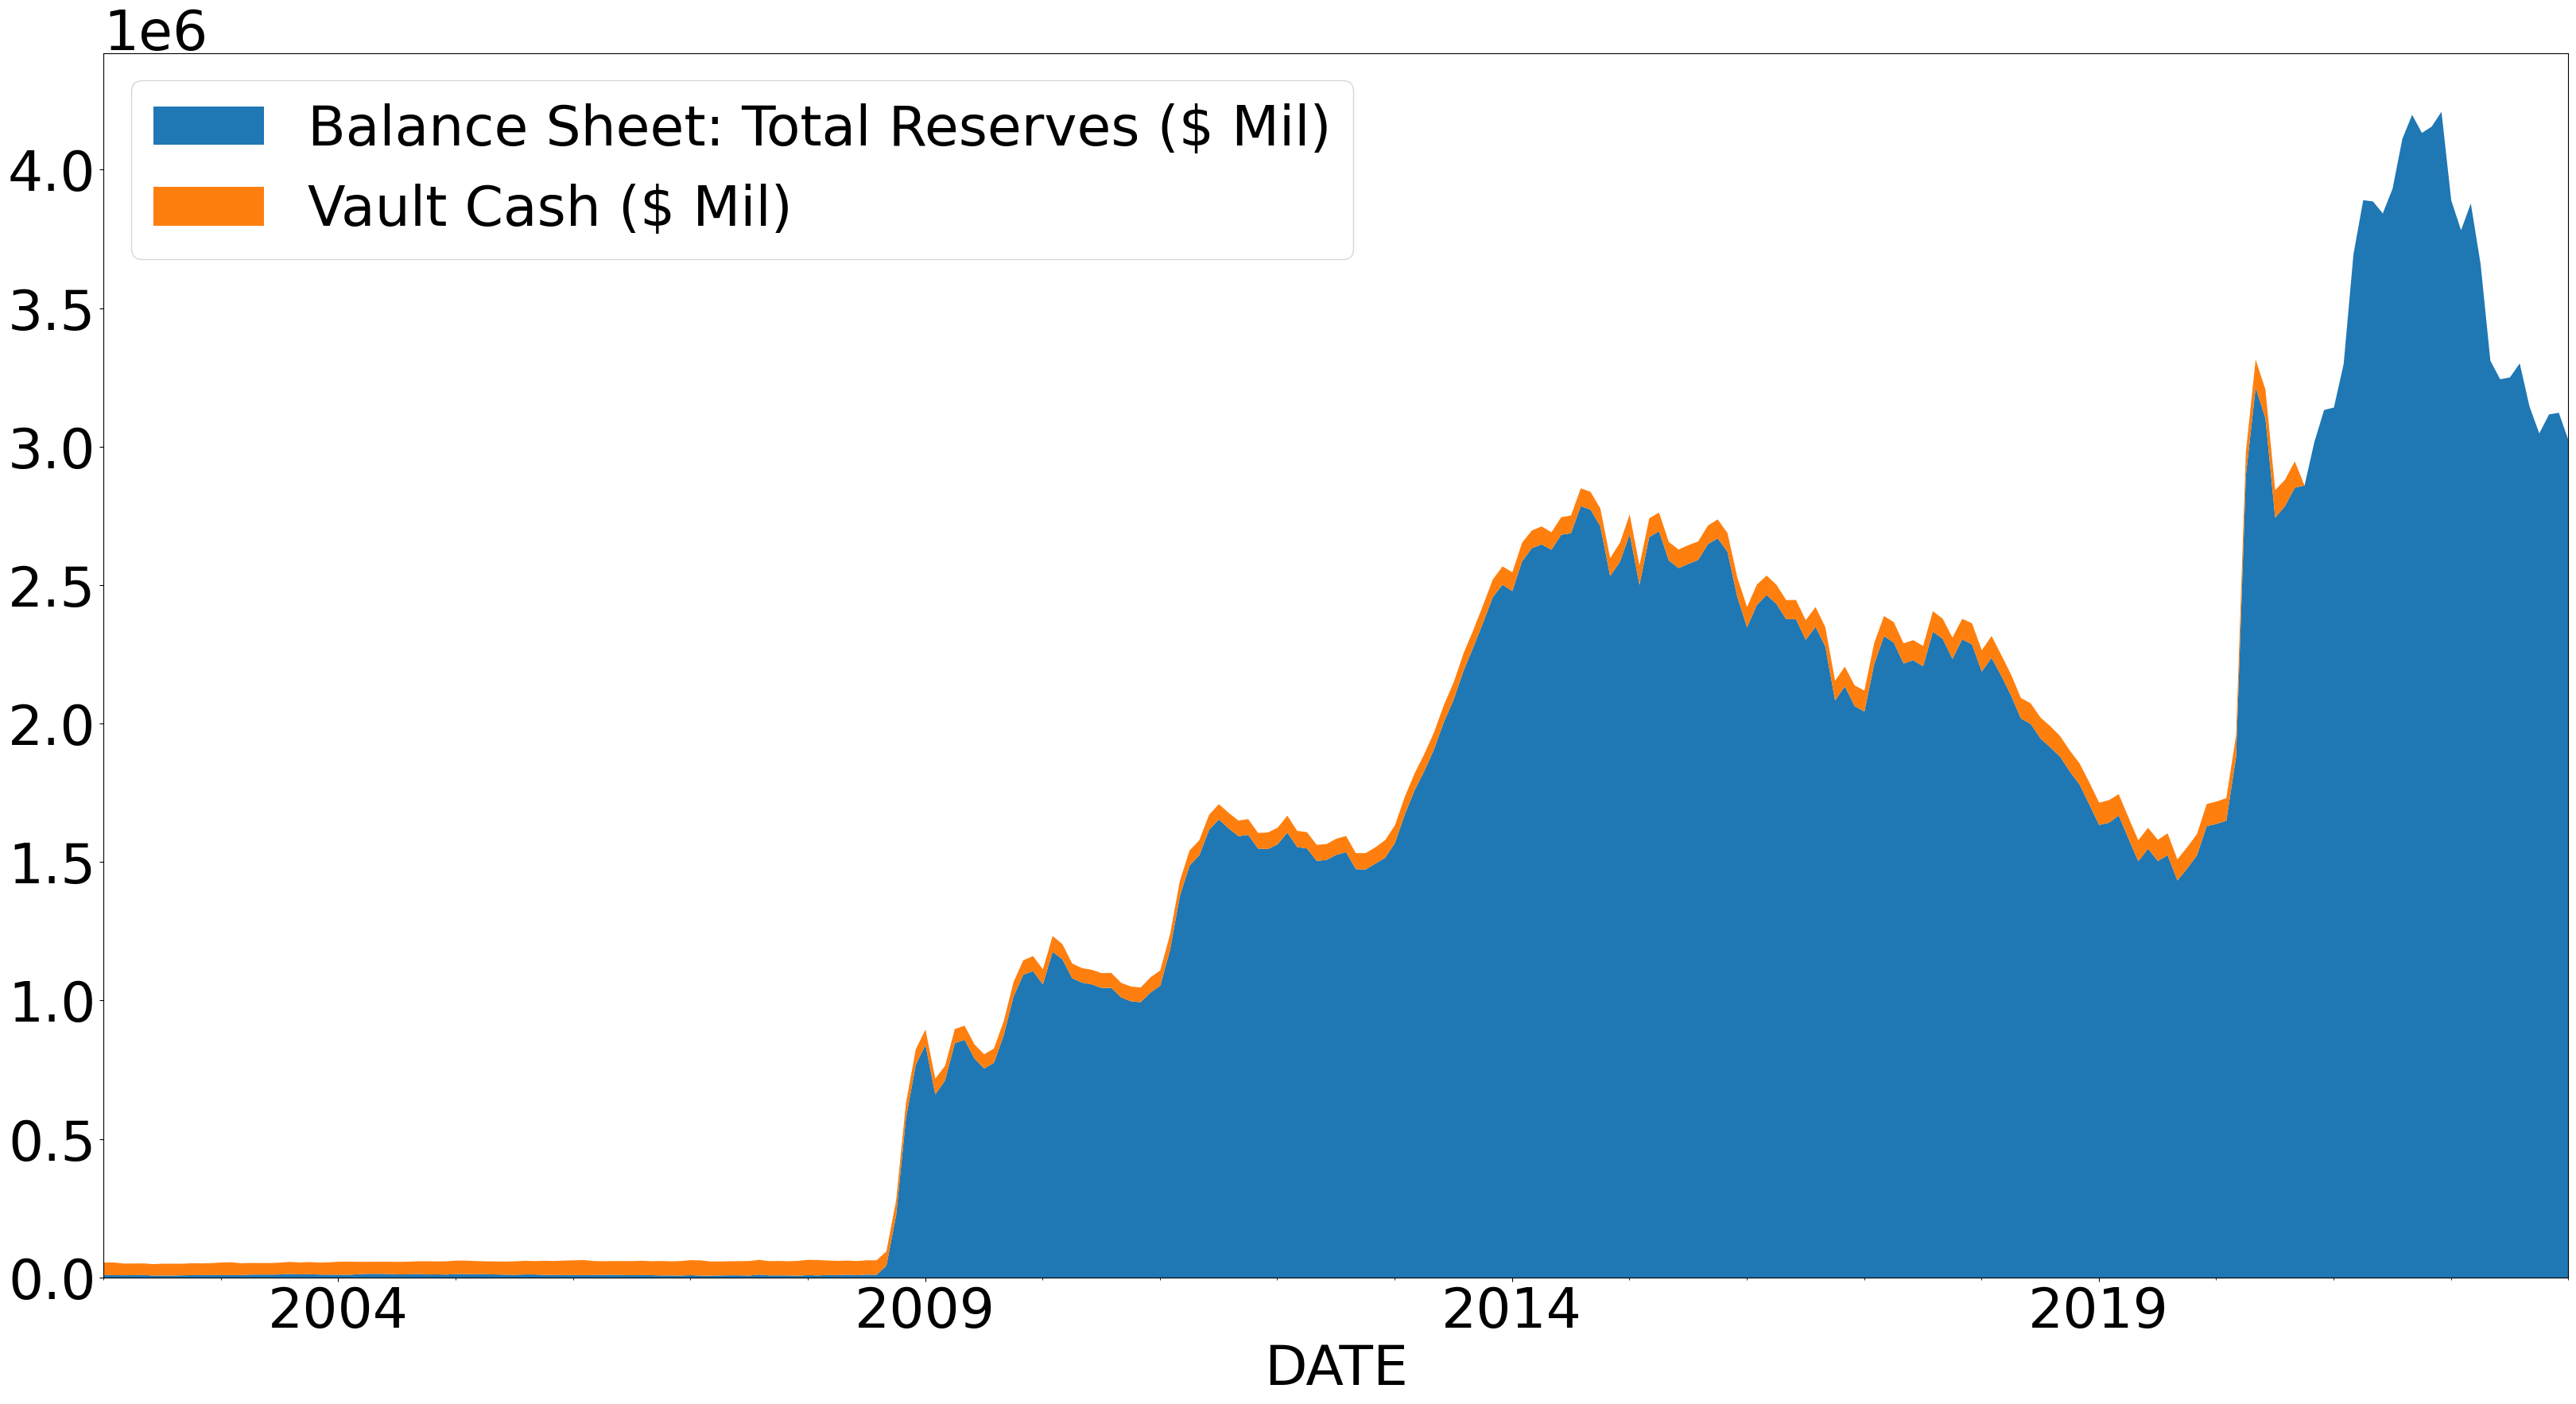

In [26]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked(data, reserve_vars)

## Assets

In [27]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars]
plot_data.dropna()

Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2022-09-30                                       8393452.25   
2022-10-31                                       8316832.75   
2022-11-30                                       8222611.80   
2022-12-31                                       8162878.50   
2023-01-31                                       8085837.50   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2022-09-30                                         5680889.50      
2022-10-31                                         5621114.50      
2022-11-30                                         5547311.00      
2022-12-31                                         5507528.50      
2023-01-31                                         5446620.25      

            Balance Sheet: Federal Agency Debt Securities ($ Mil)  \
DATE                                                                
2002-12-31                                               10.0       
2003-01-31                                               10.0       
2003-02-28                                               10.0       
2003-03-31                                               10.0       
2003-04-30                                               10.0       
...                                                       ...       
2022-09-30                                             2347.0       
2022-10-31                                             2347.0       
2022-11-30                                             2347.0       
2022-12-31                                             2347.0       
2023-01-31                                             2347.0       

            Balance Sheet: Mortgage-Backed Securities ($ Mil)  
DATE                                                           
2002-12-31                                               0.00  
2003-01-31                                               0.00  
2003-02-28                                               0.00  
2003-03-31                                               0.00  
2003-04-30                                               0.00  
...                                                       ...  
2022-09-30                                         2710215.50  
2022-10-31                                         2693371.50  
2022-11-30                                         2672953.40  
2022-12-31                                         2653003.25  
2023-01-31                                         2636869.75  

[242 rows x 4 columns]

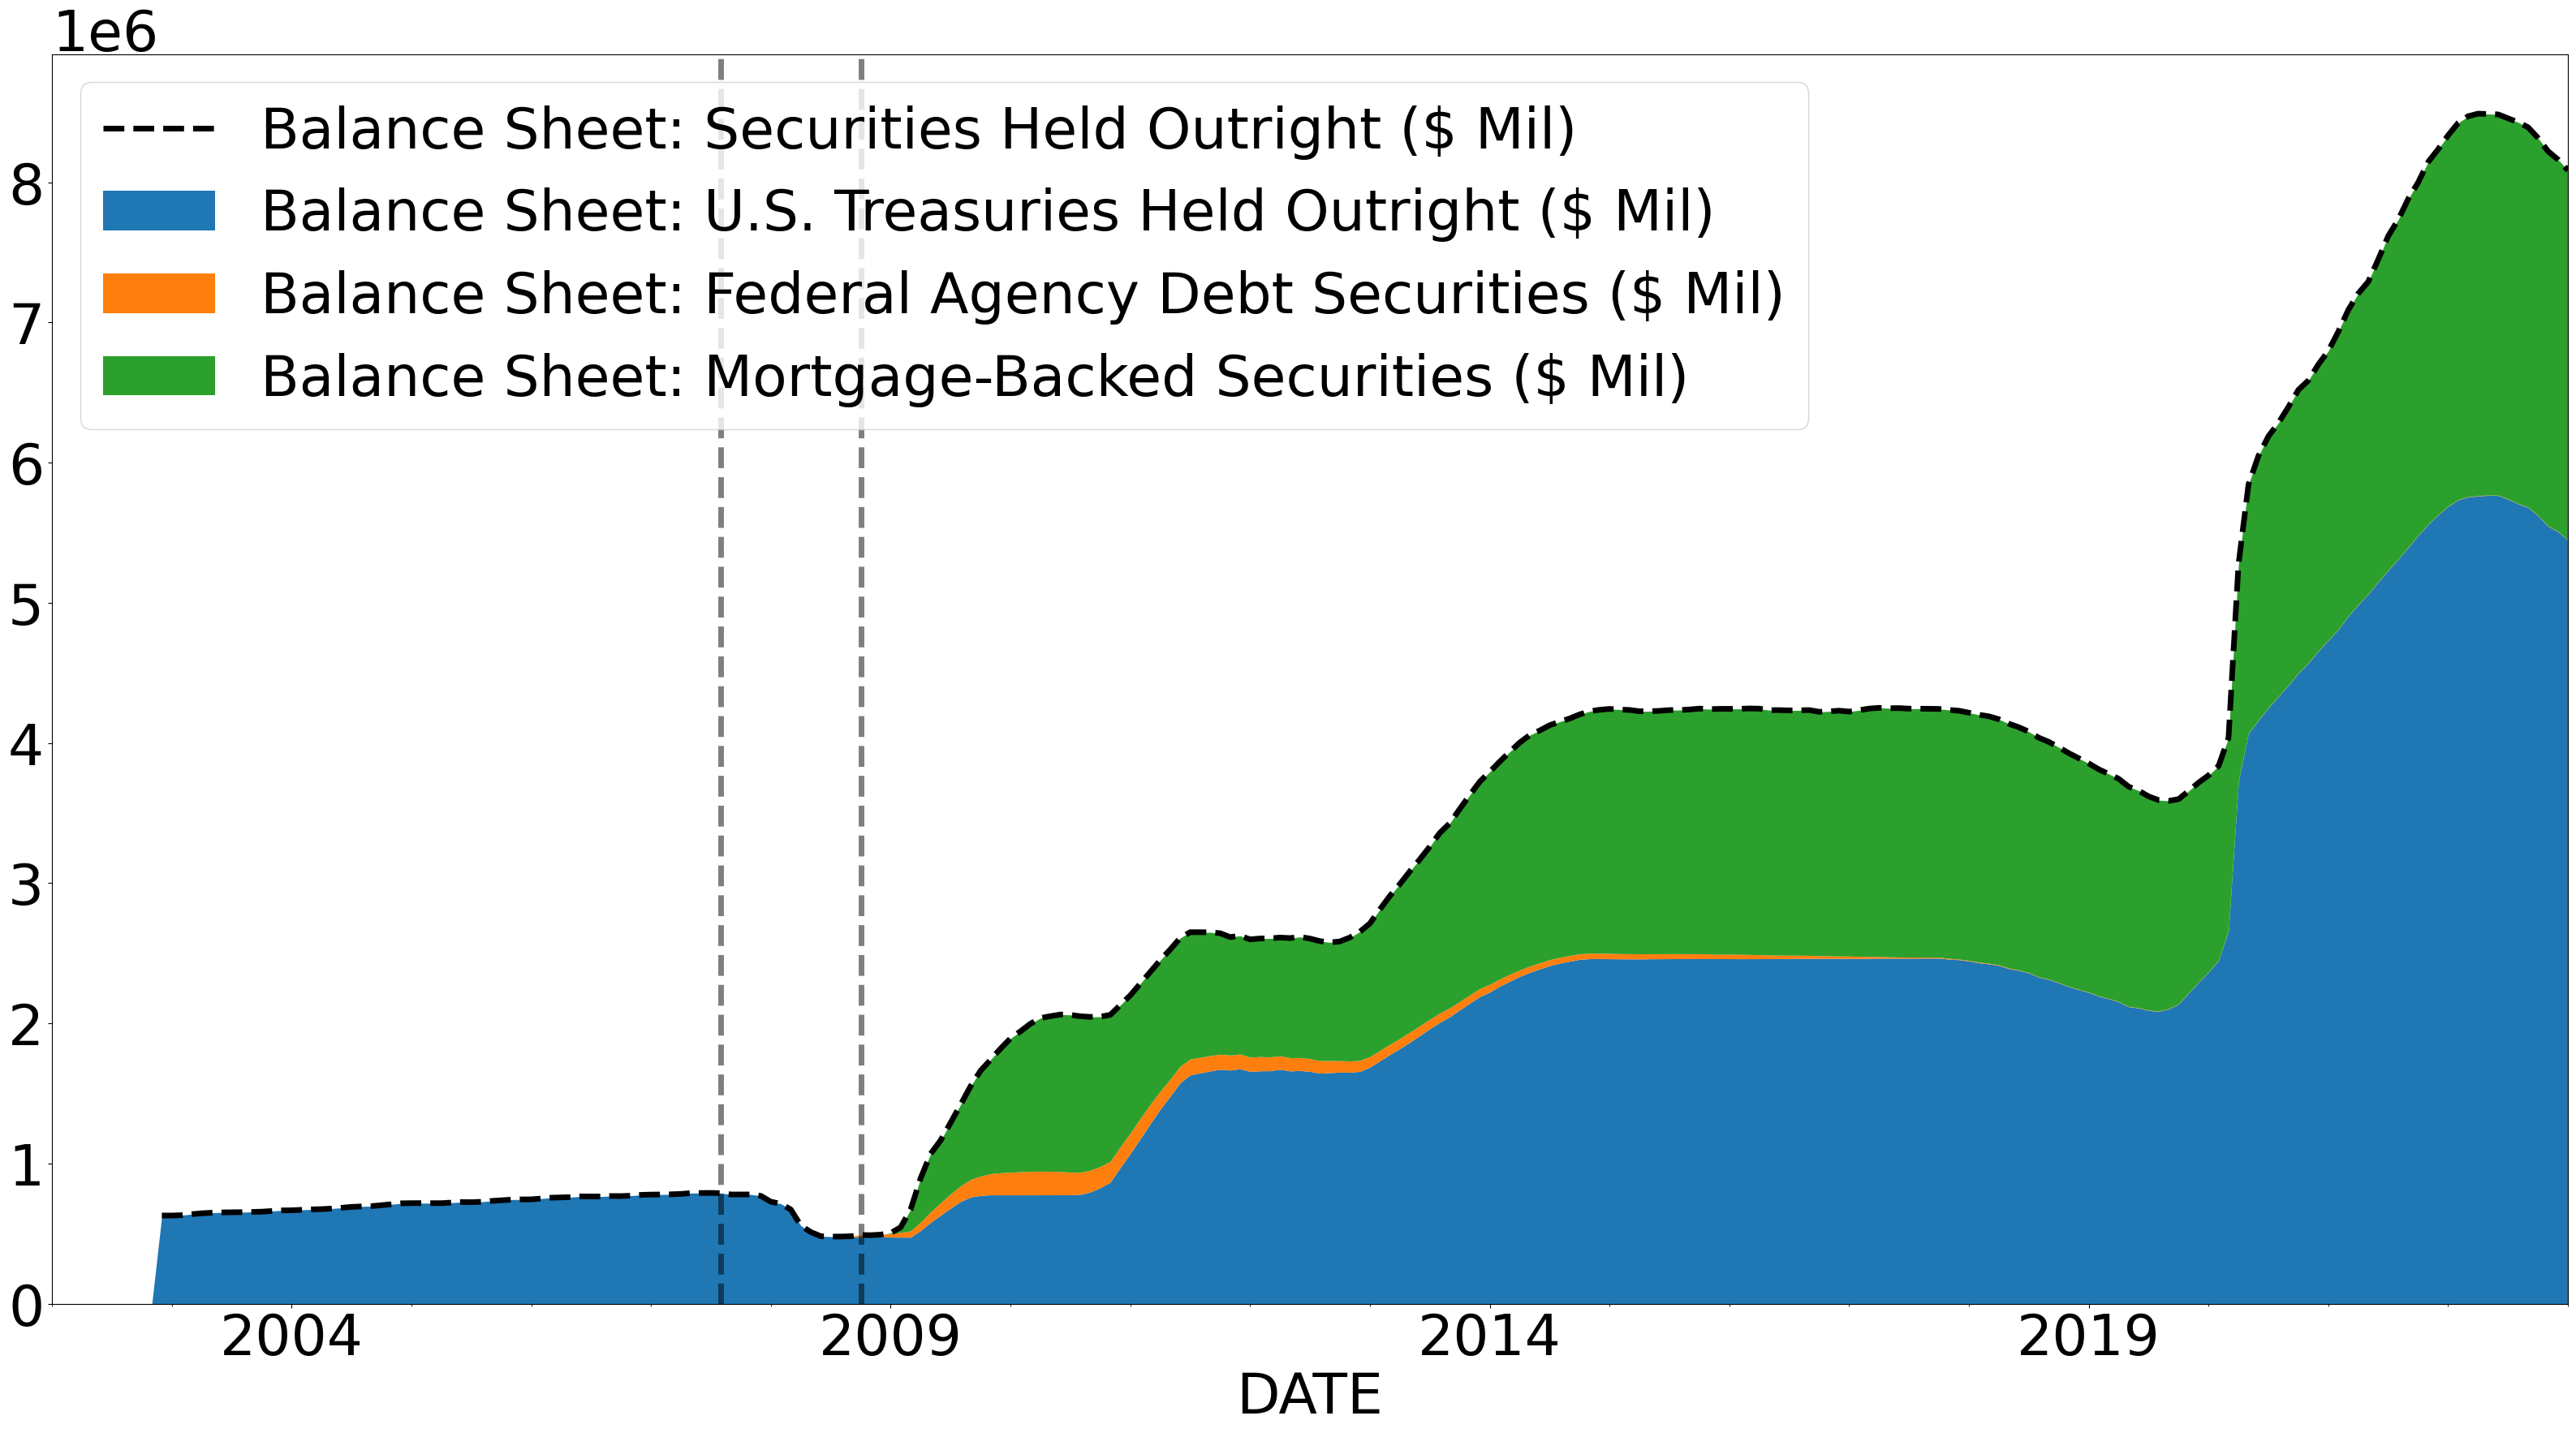

In [28]:
fig, ax = plot_stacked(plot_data, stack_vars = stack_vars, total_var = total_var, linewidth = 5)
ax.axvline("2007-08-01", ls = "--", color="k", linewidth = 5, alpha = .5)
ax.axvline("2008-10-01", ls = "--", color="k", linewidth = 5, alpha = .5)

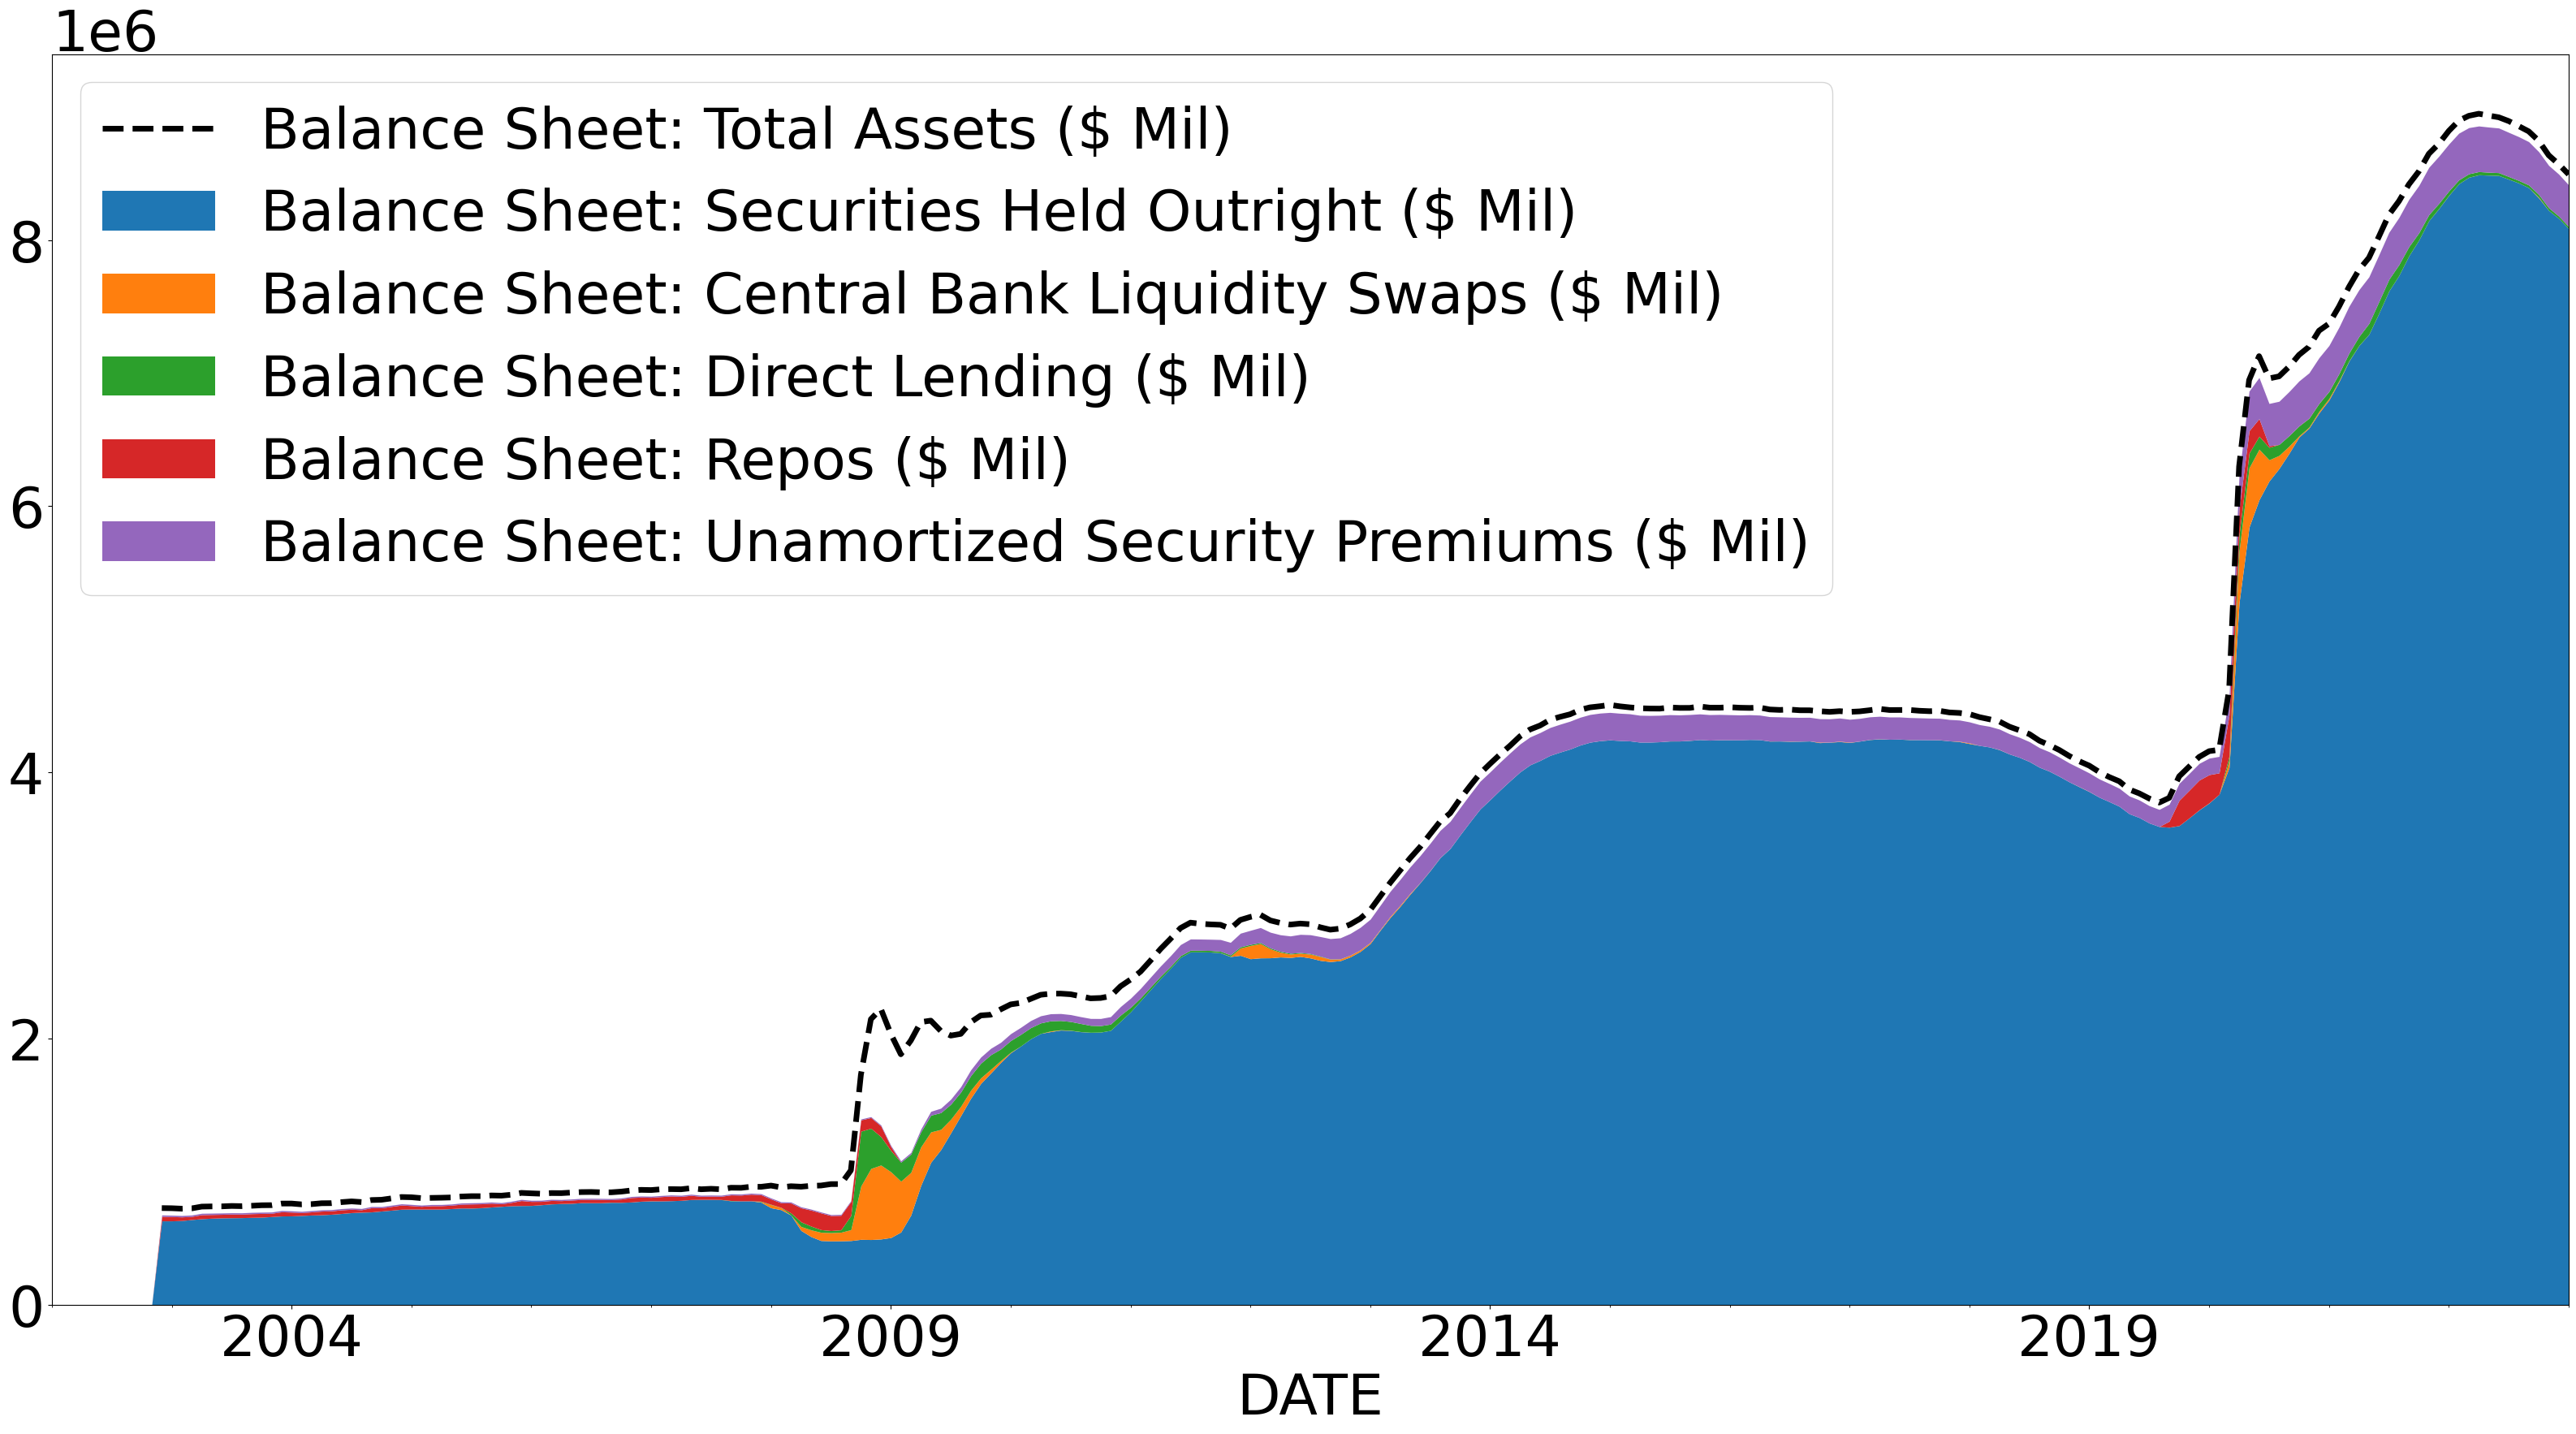

In [29]:
account_vars = ["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(plot_data, 
                   stack_vars = stack_vars,
                   linewidth = 5, 
                   total_var = total_var)

## Liabilities of the Federal Reserve

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

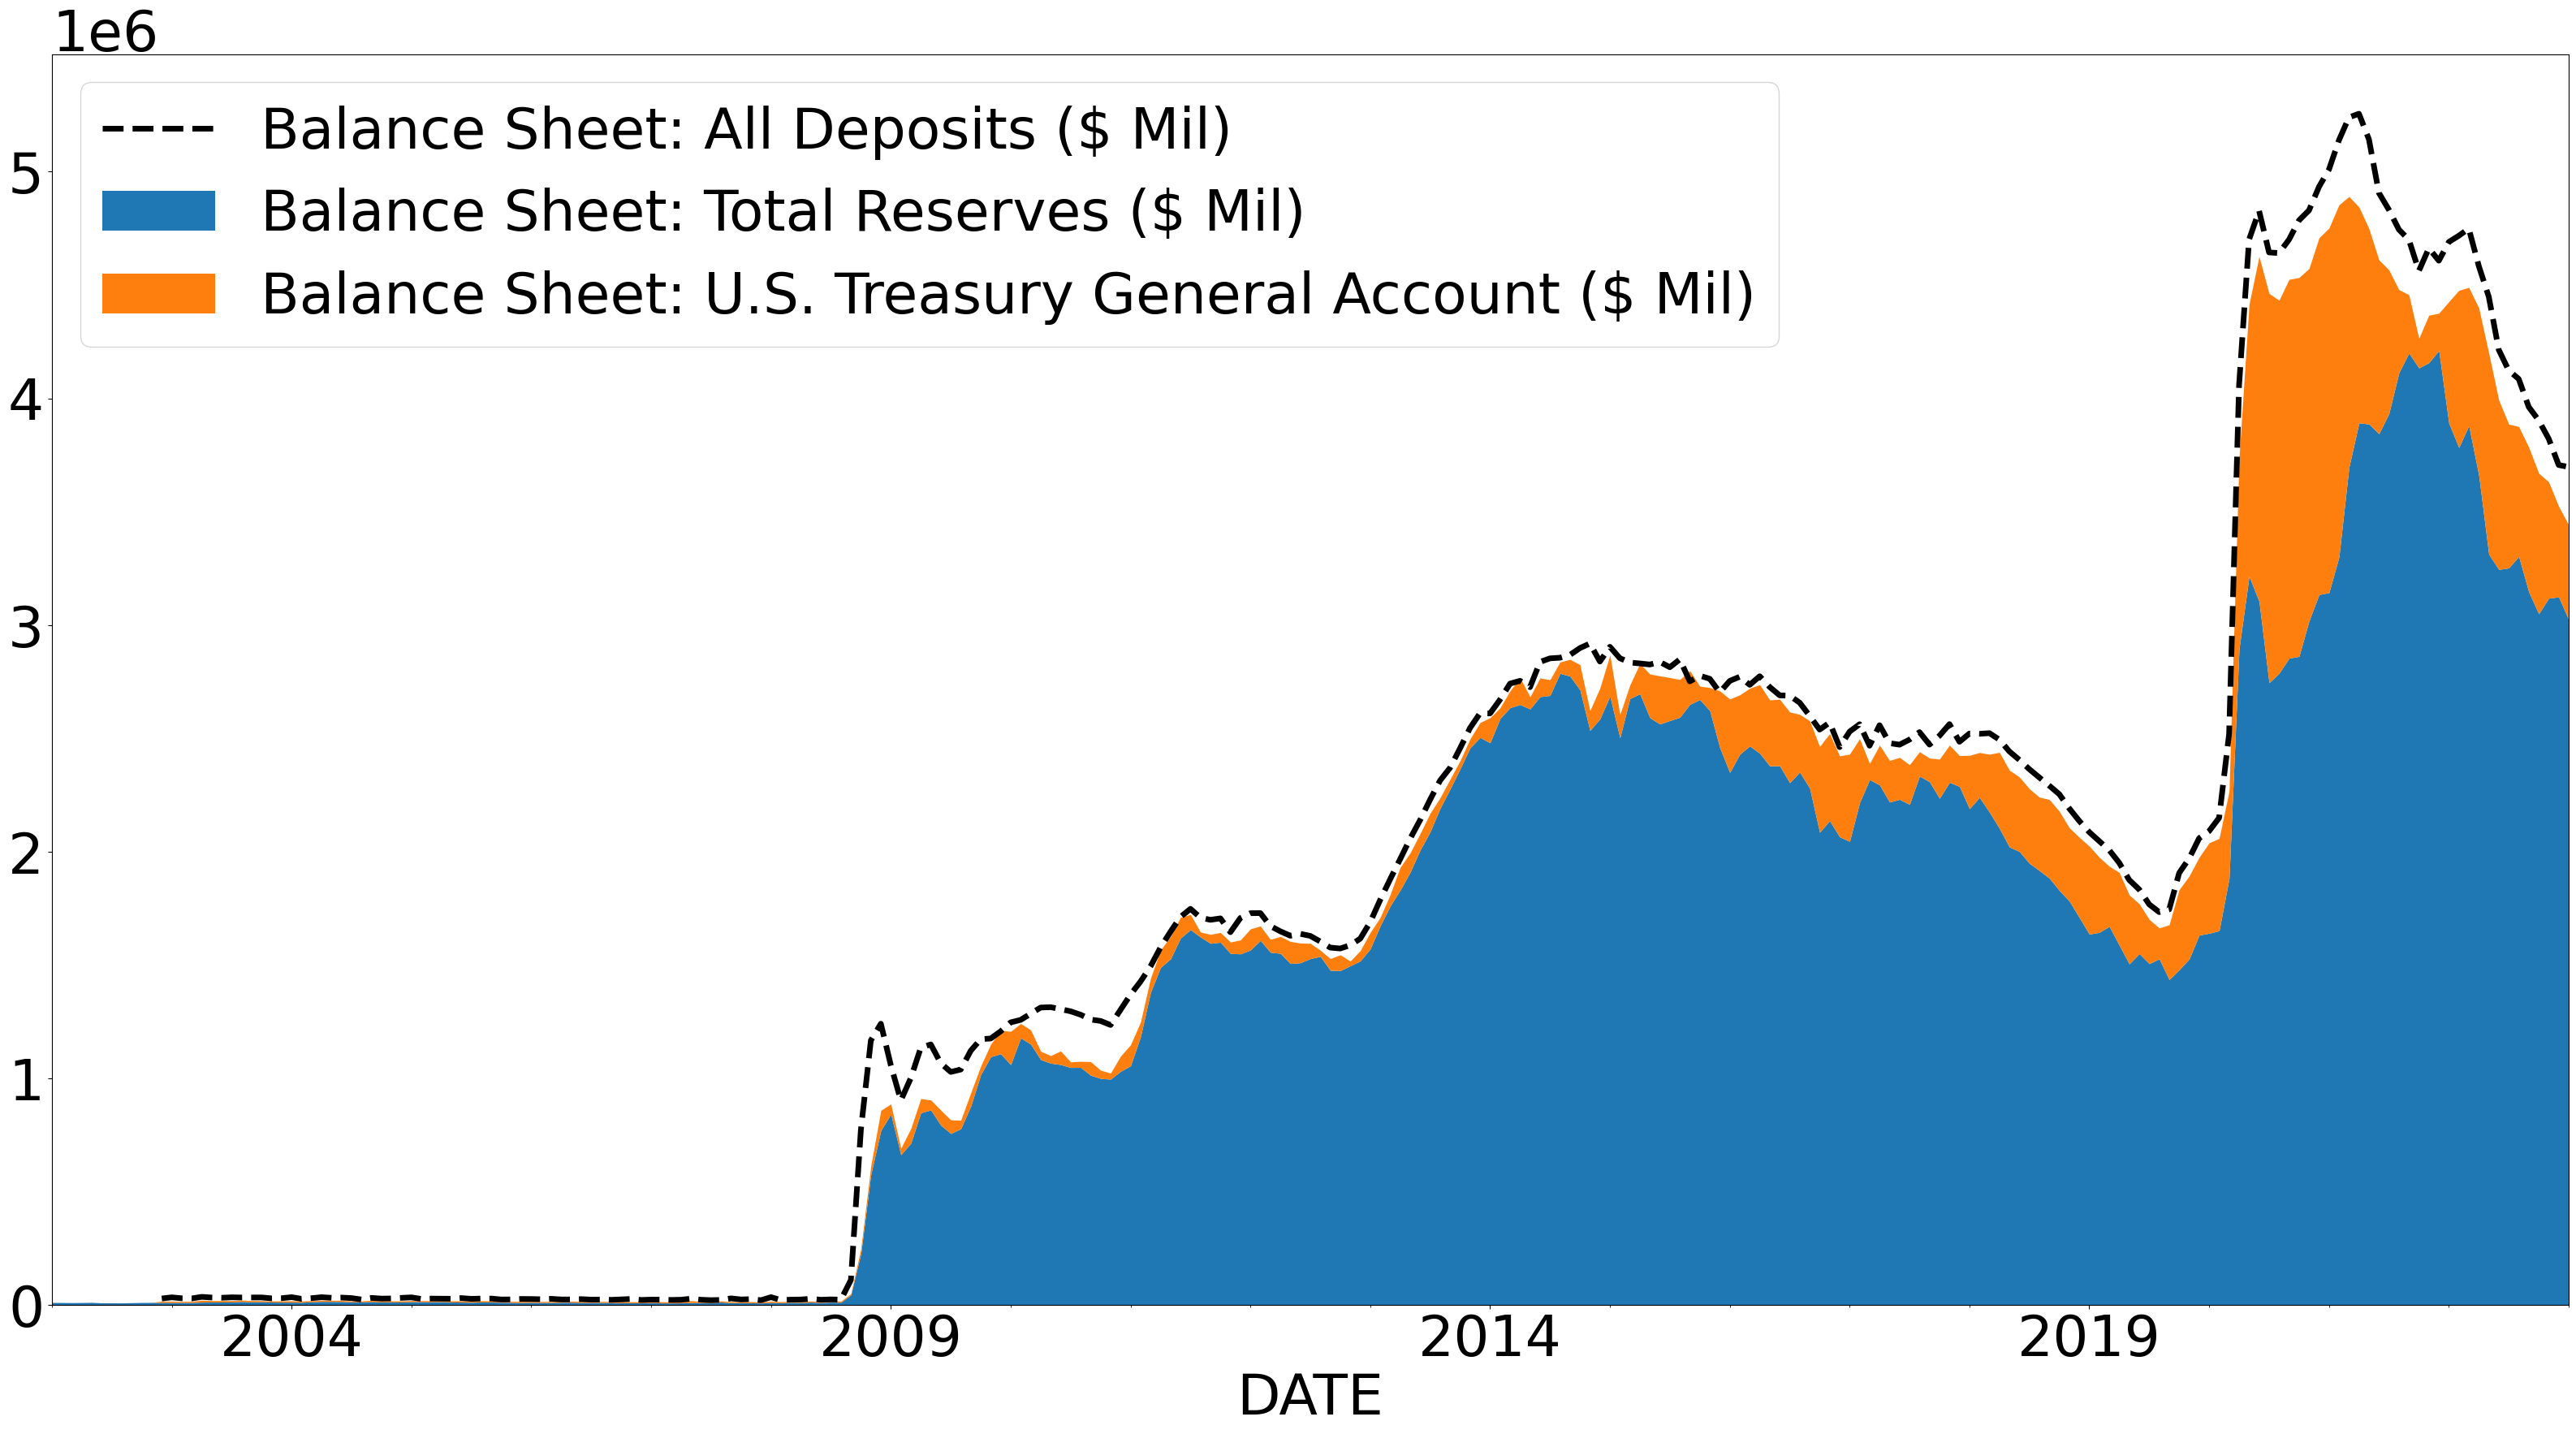

In [30]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_stacked(plot_data, stack_vars, linewidth = 5, total_var = total_var)

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

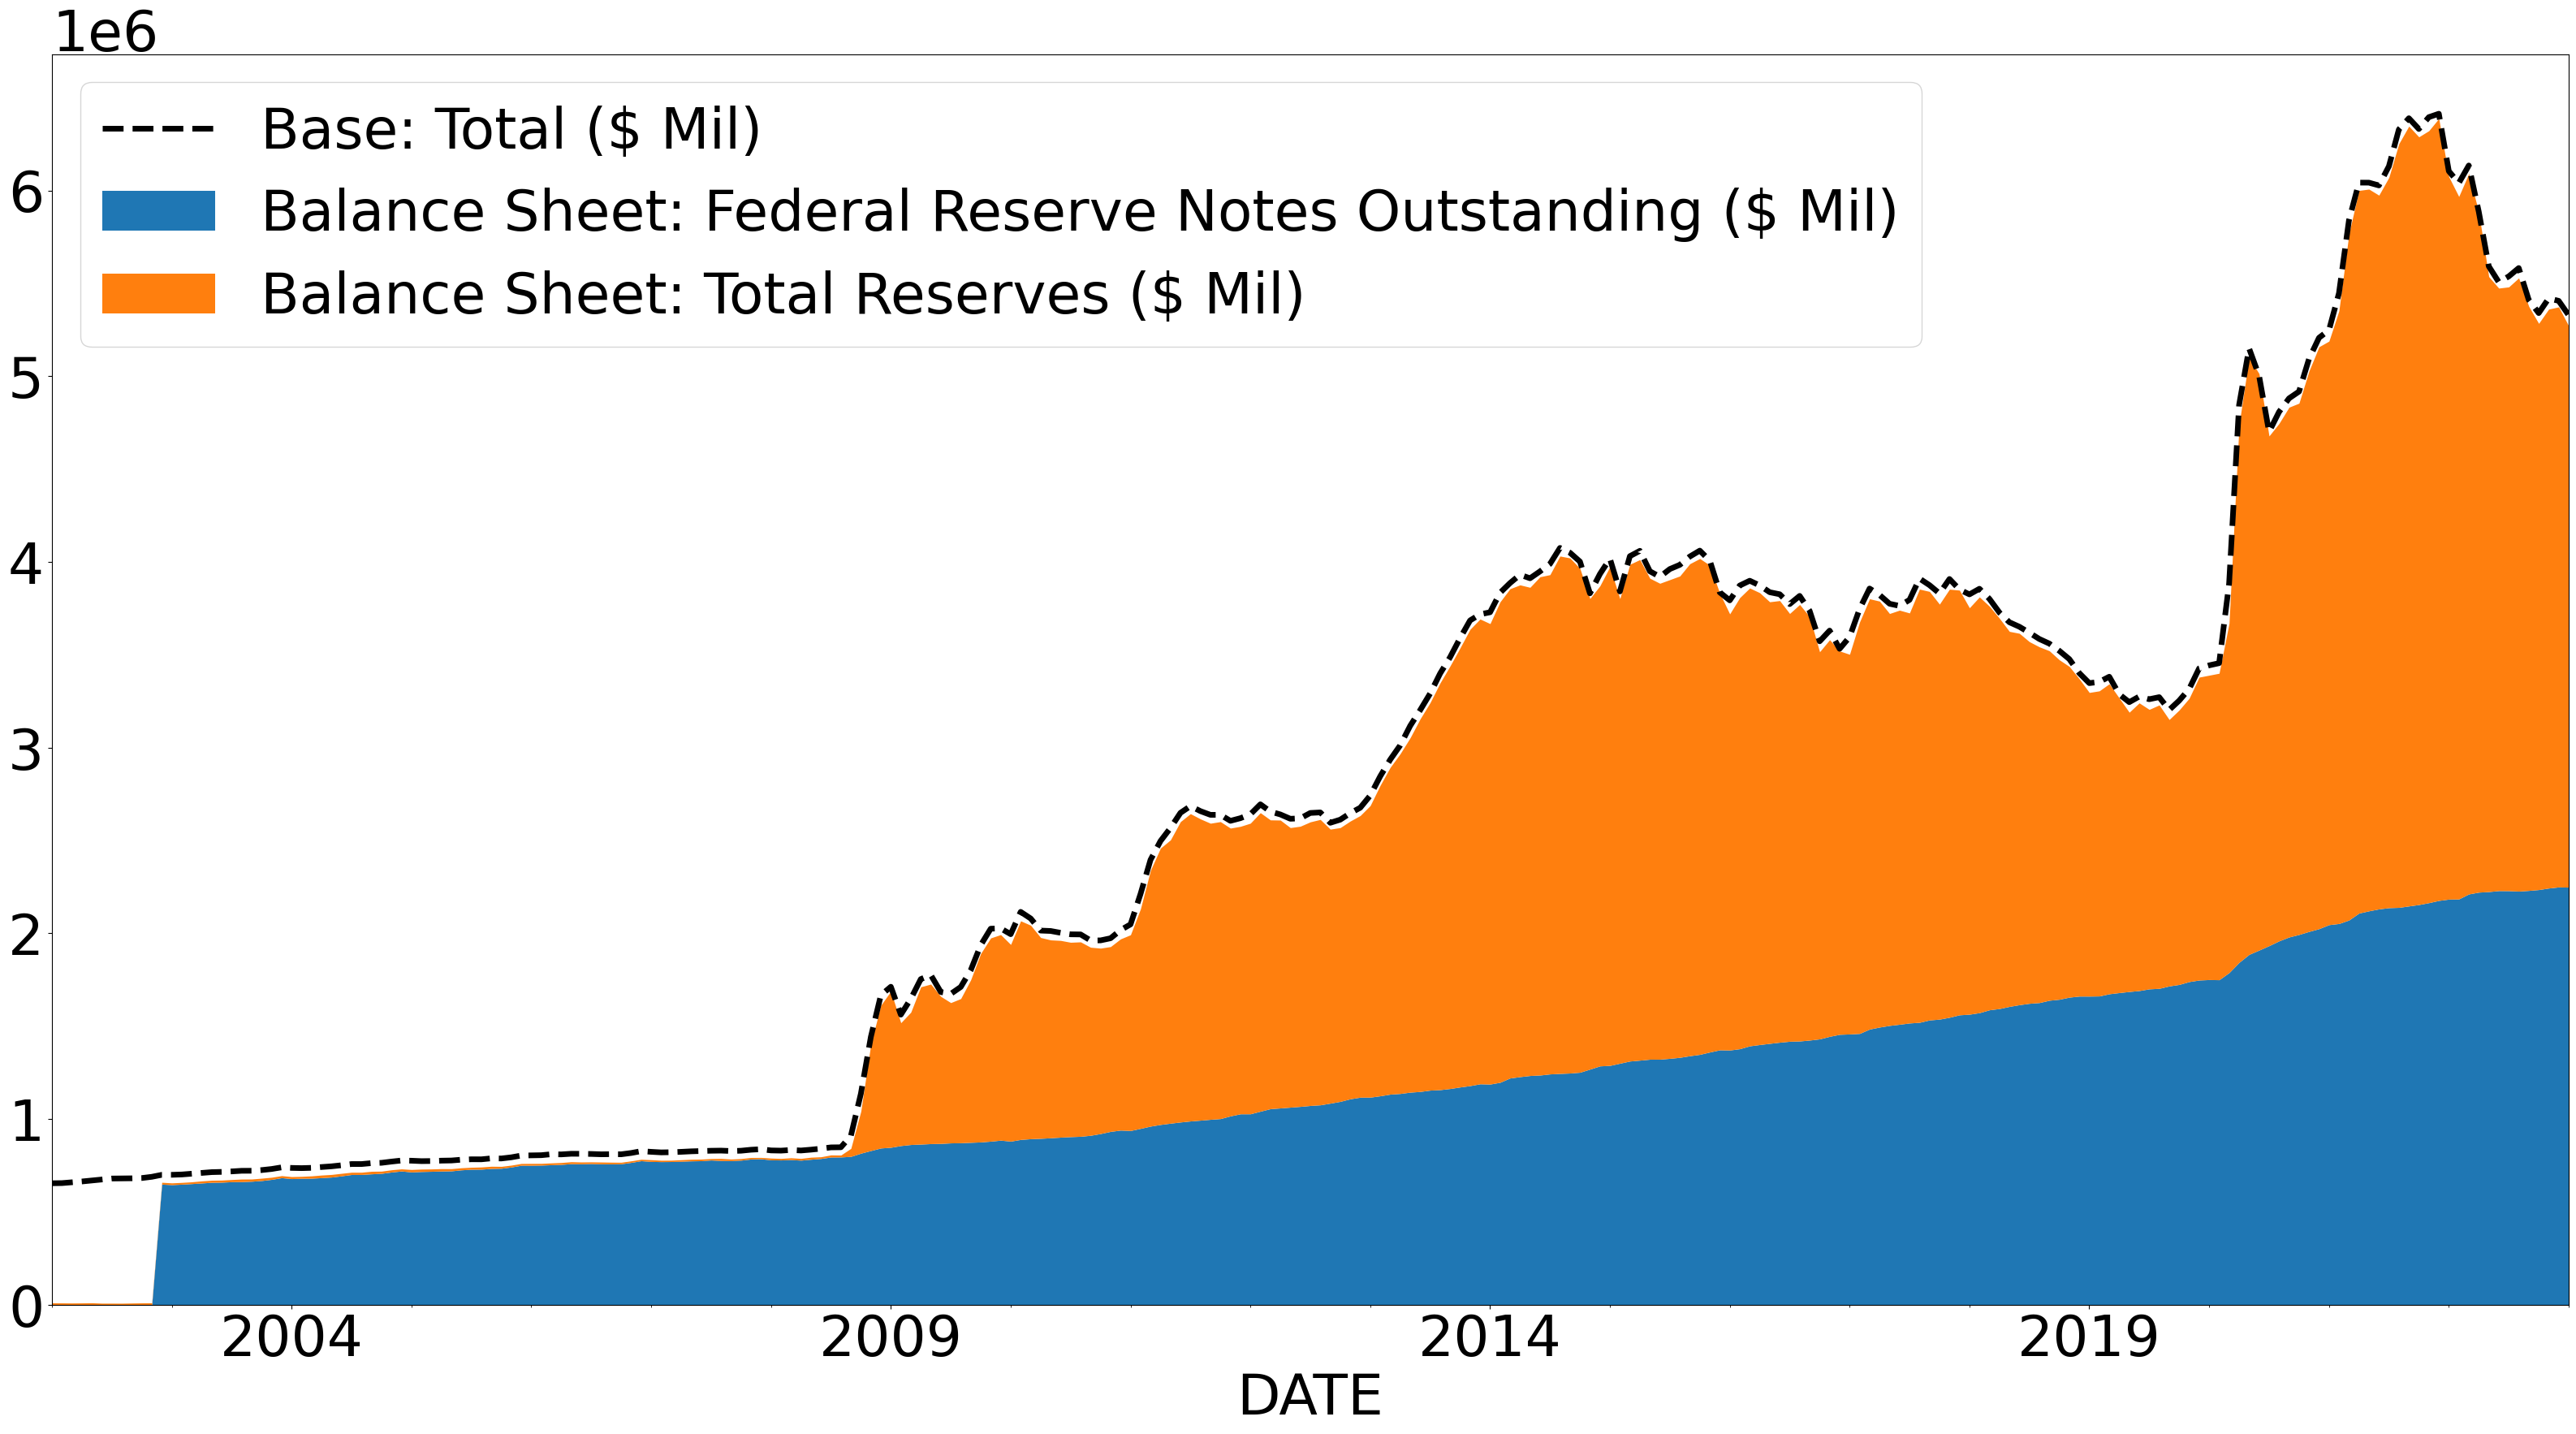

In [31]:
account_vars = ["Base: Total ($ Mil)",
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_stacked(plot_data, stack_vars, linewidth = 5, total_var = total_var)

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

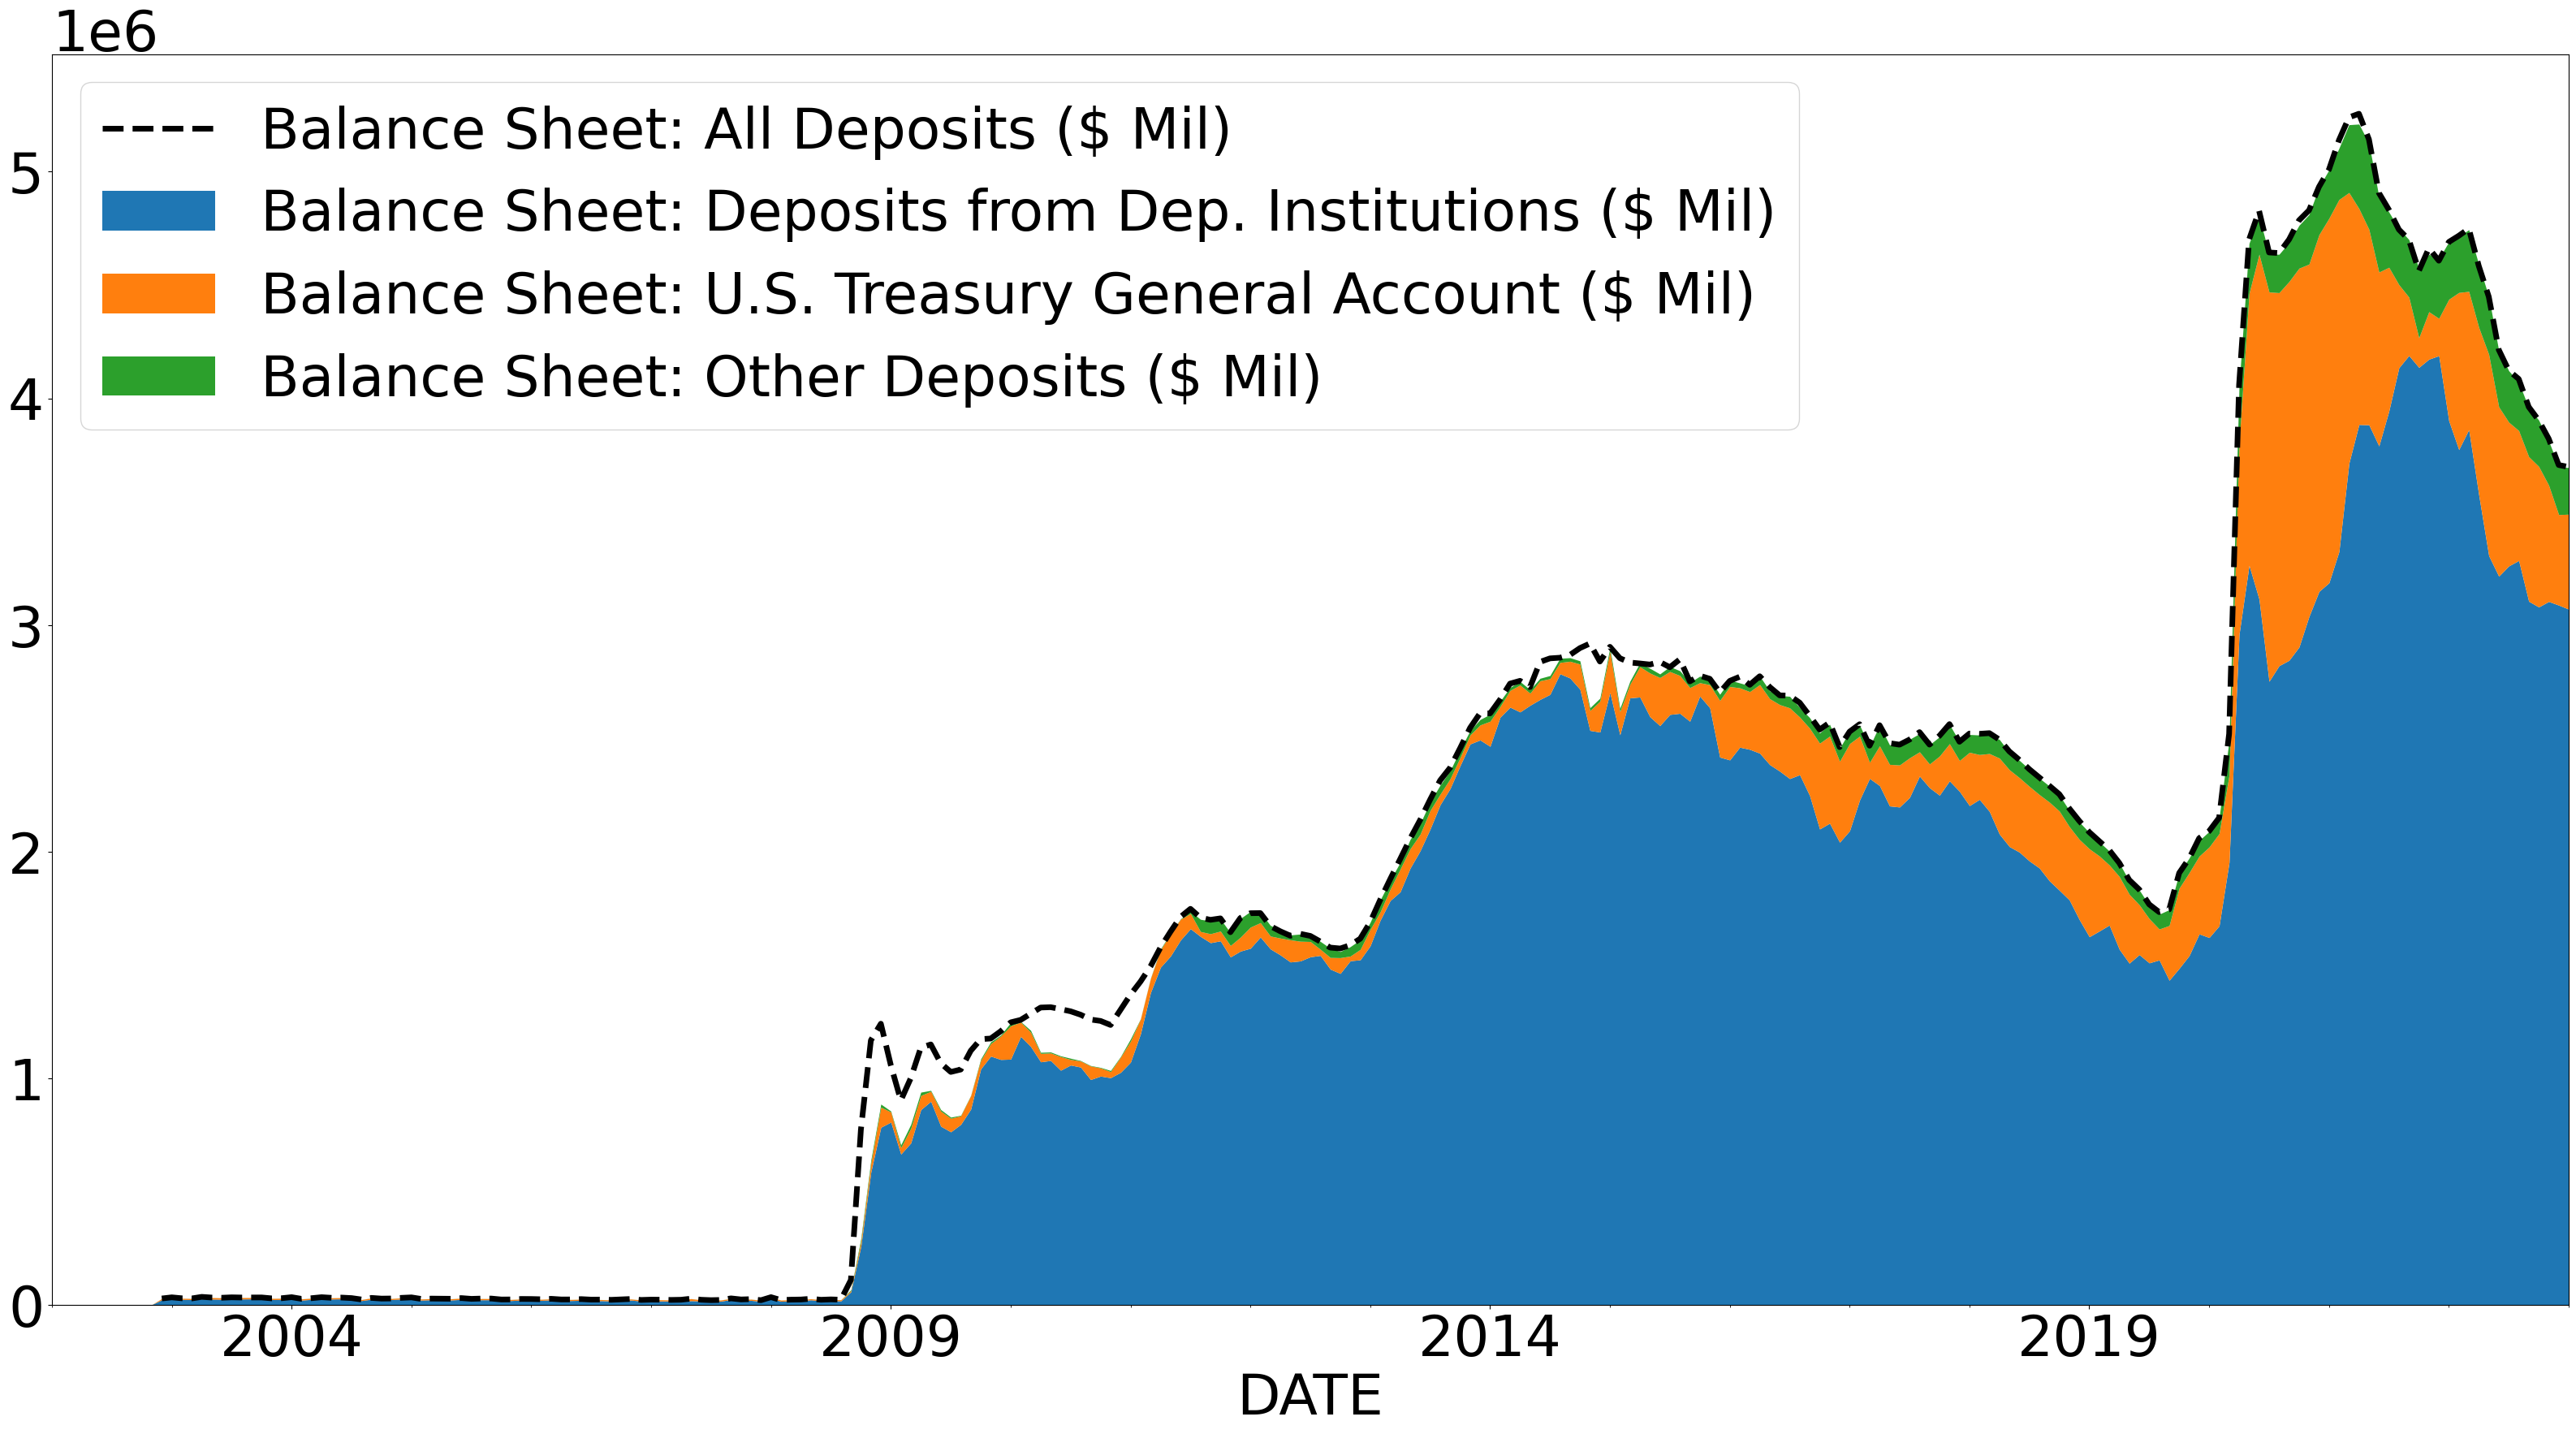

In [32]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_stacked(plot_data, stack_vars, linewidth = 5, total_var = total_var)

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot: xlabel='DATE'>)

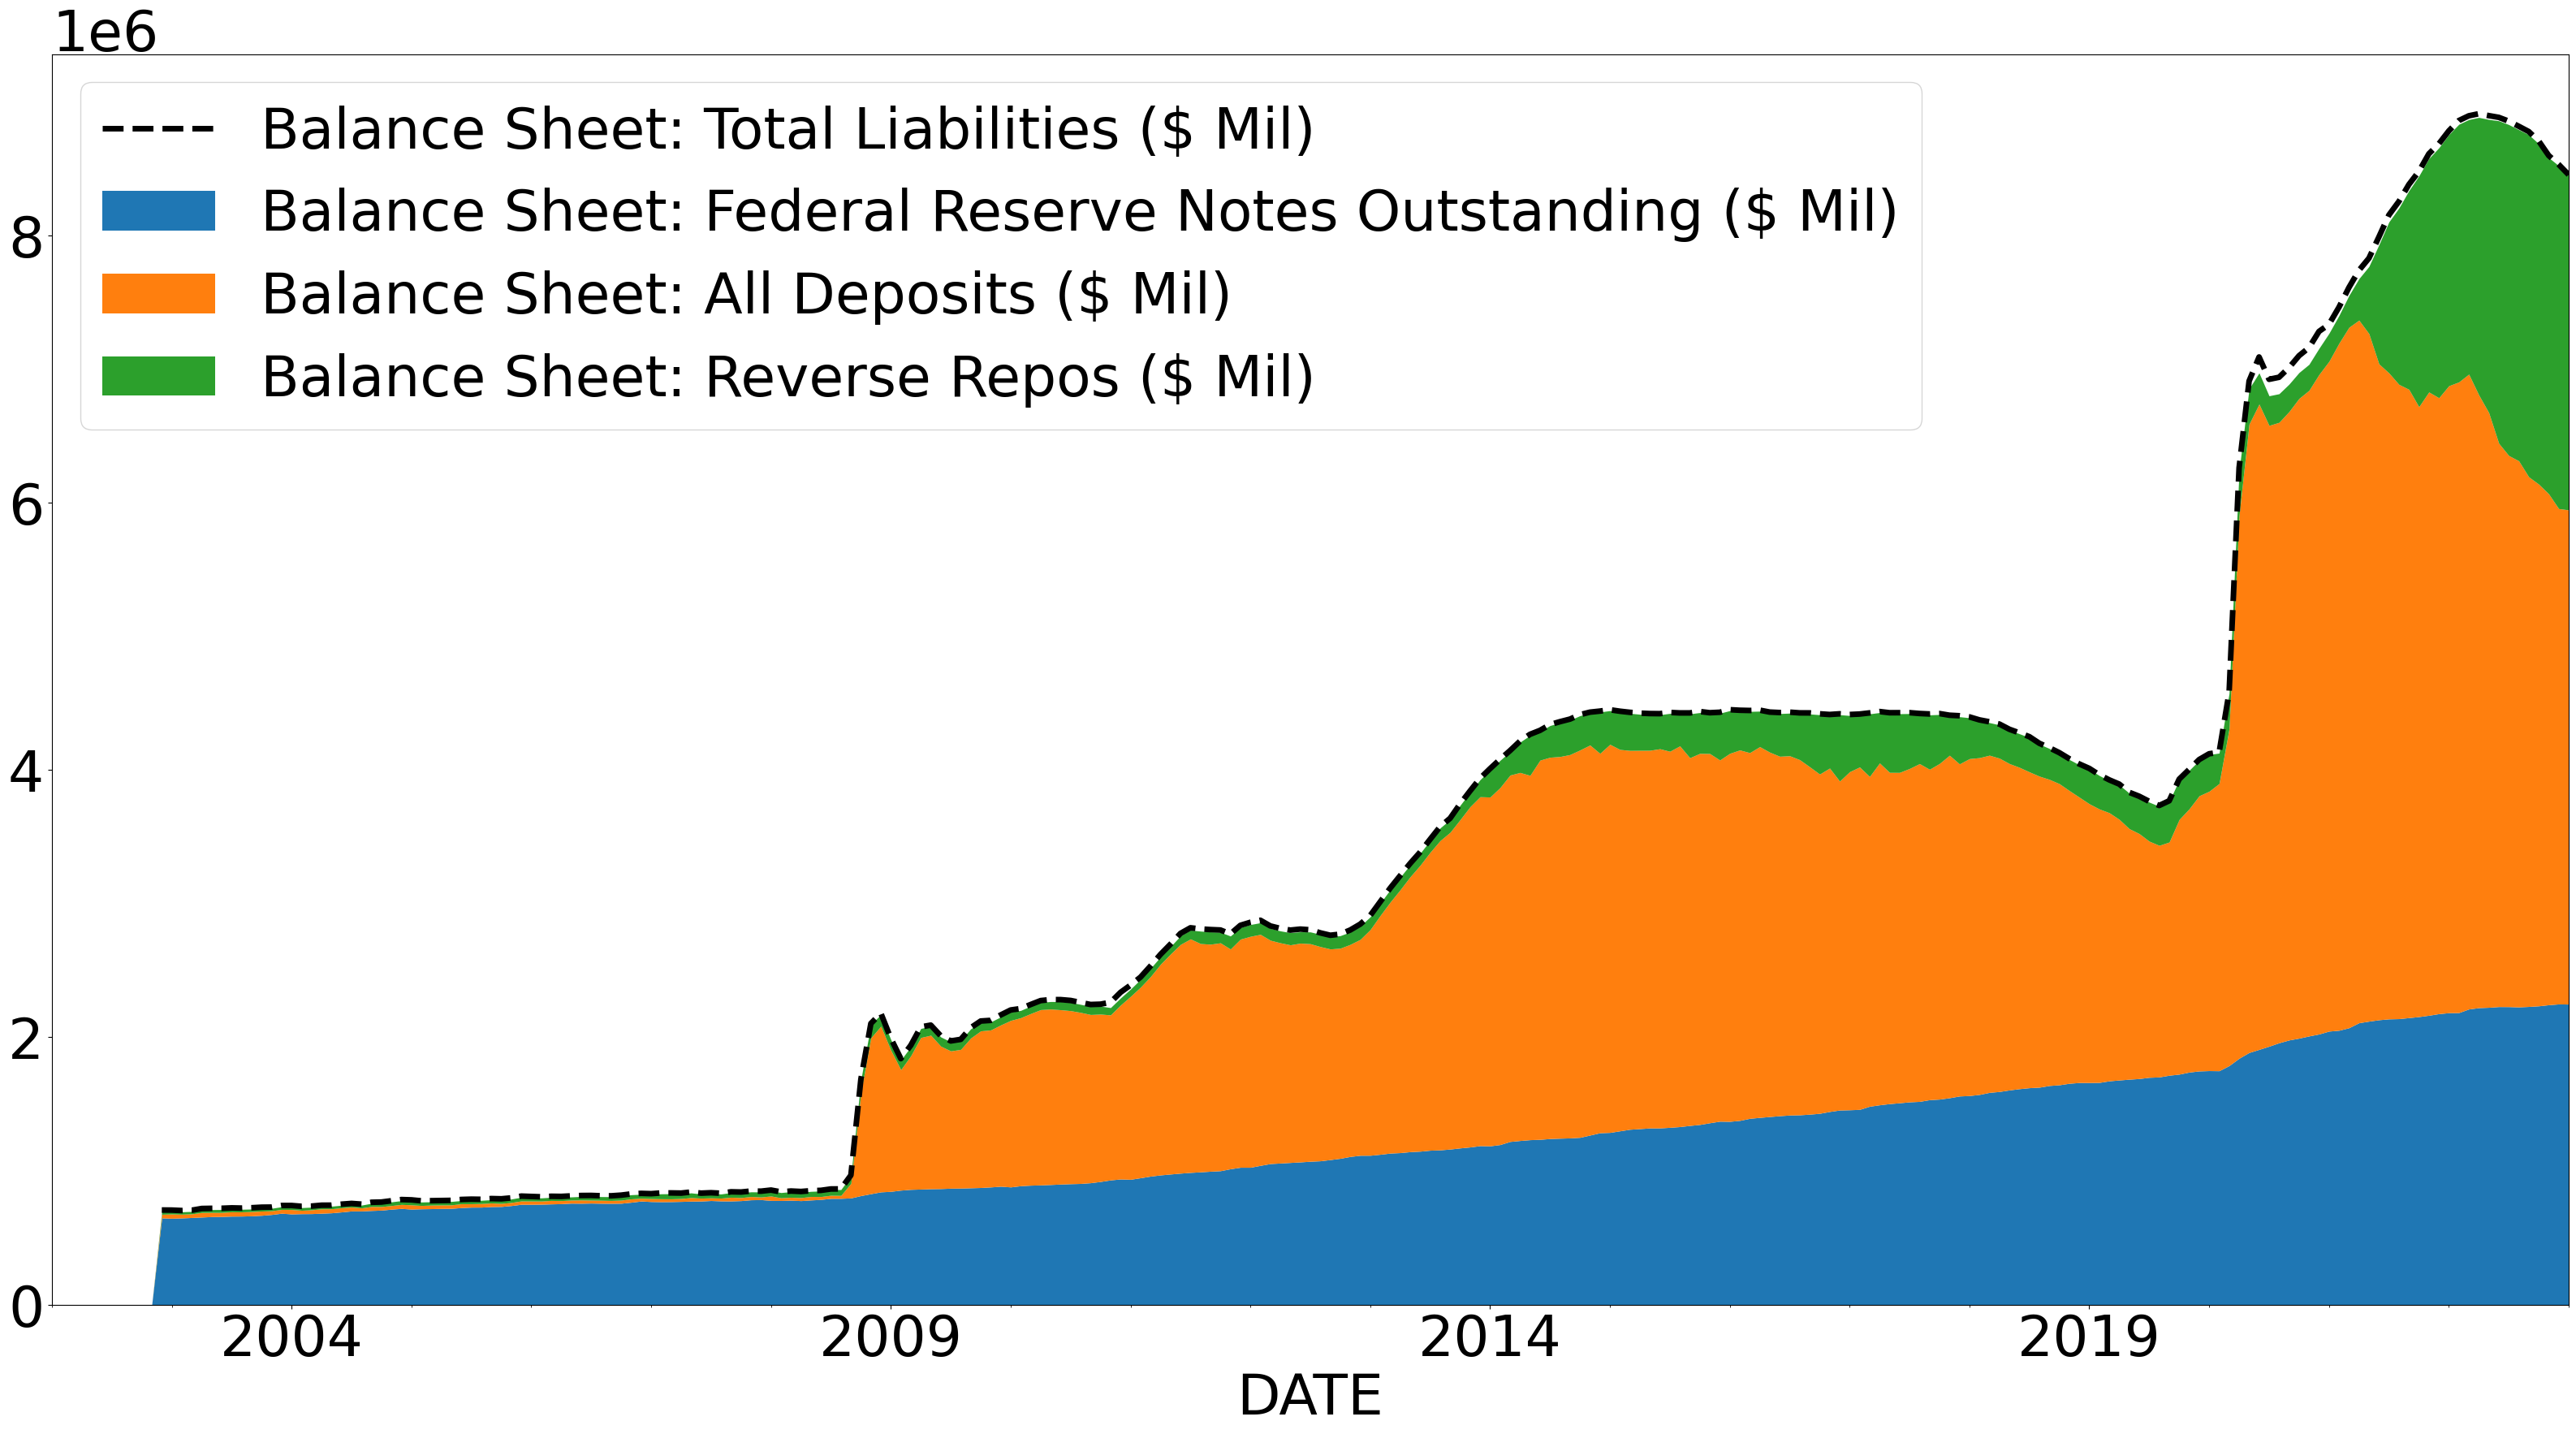

In [33]:
account_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                # Approx. Currency in Circulation
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                # Federal Reserve Borrowing
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_stacked(plot_data, stack_vars, linewidth = 5, total_var = total_var)

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


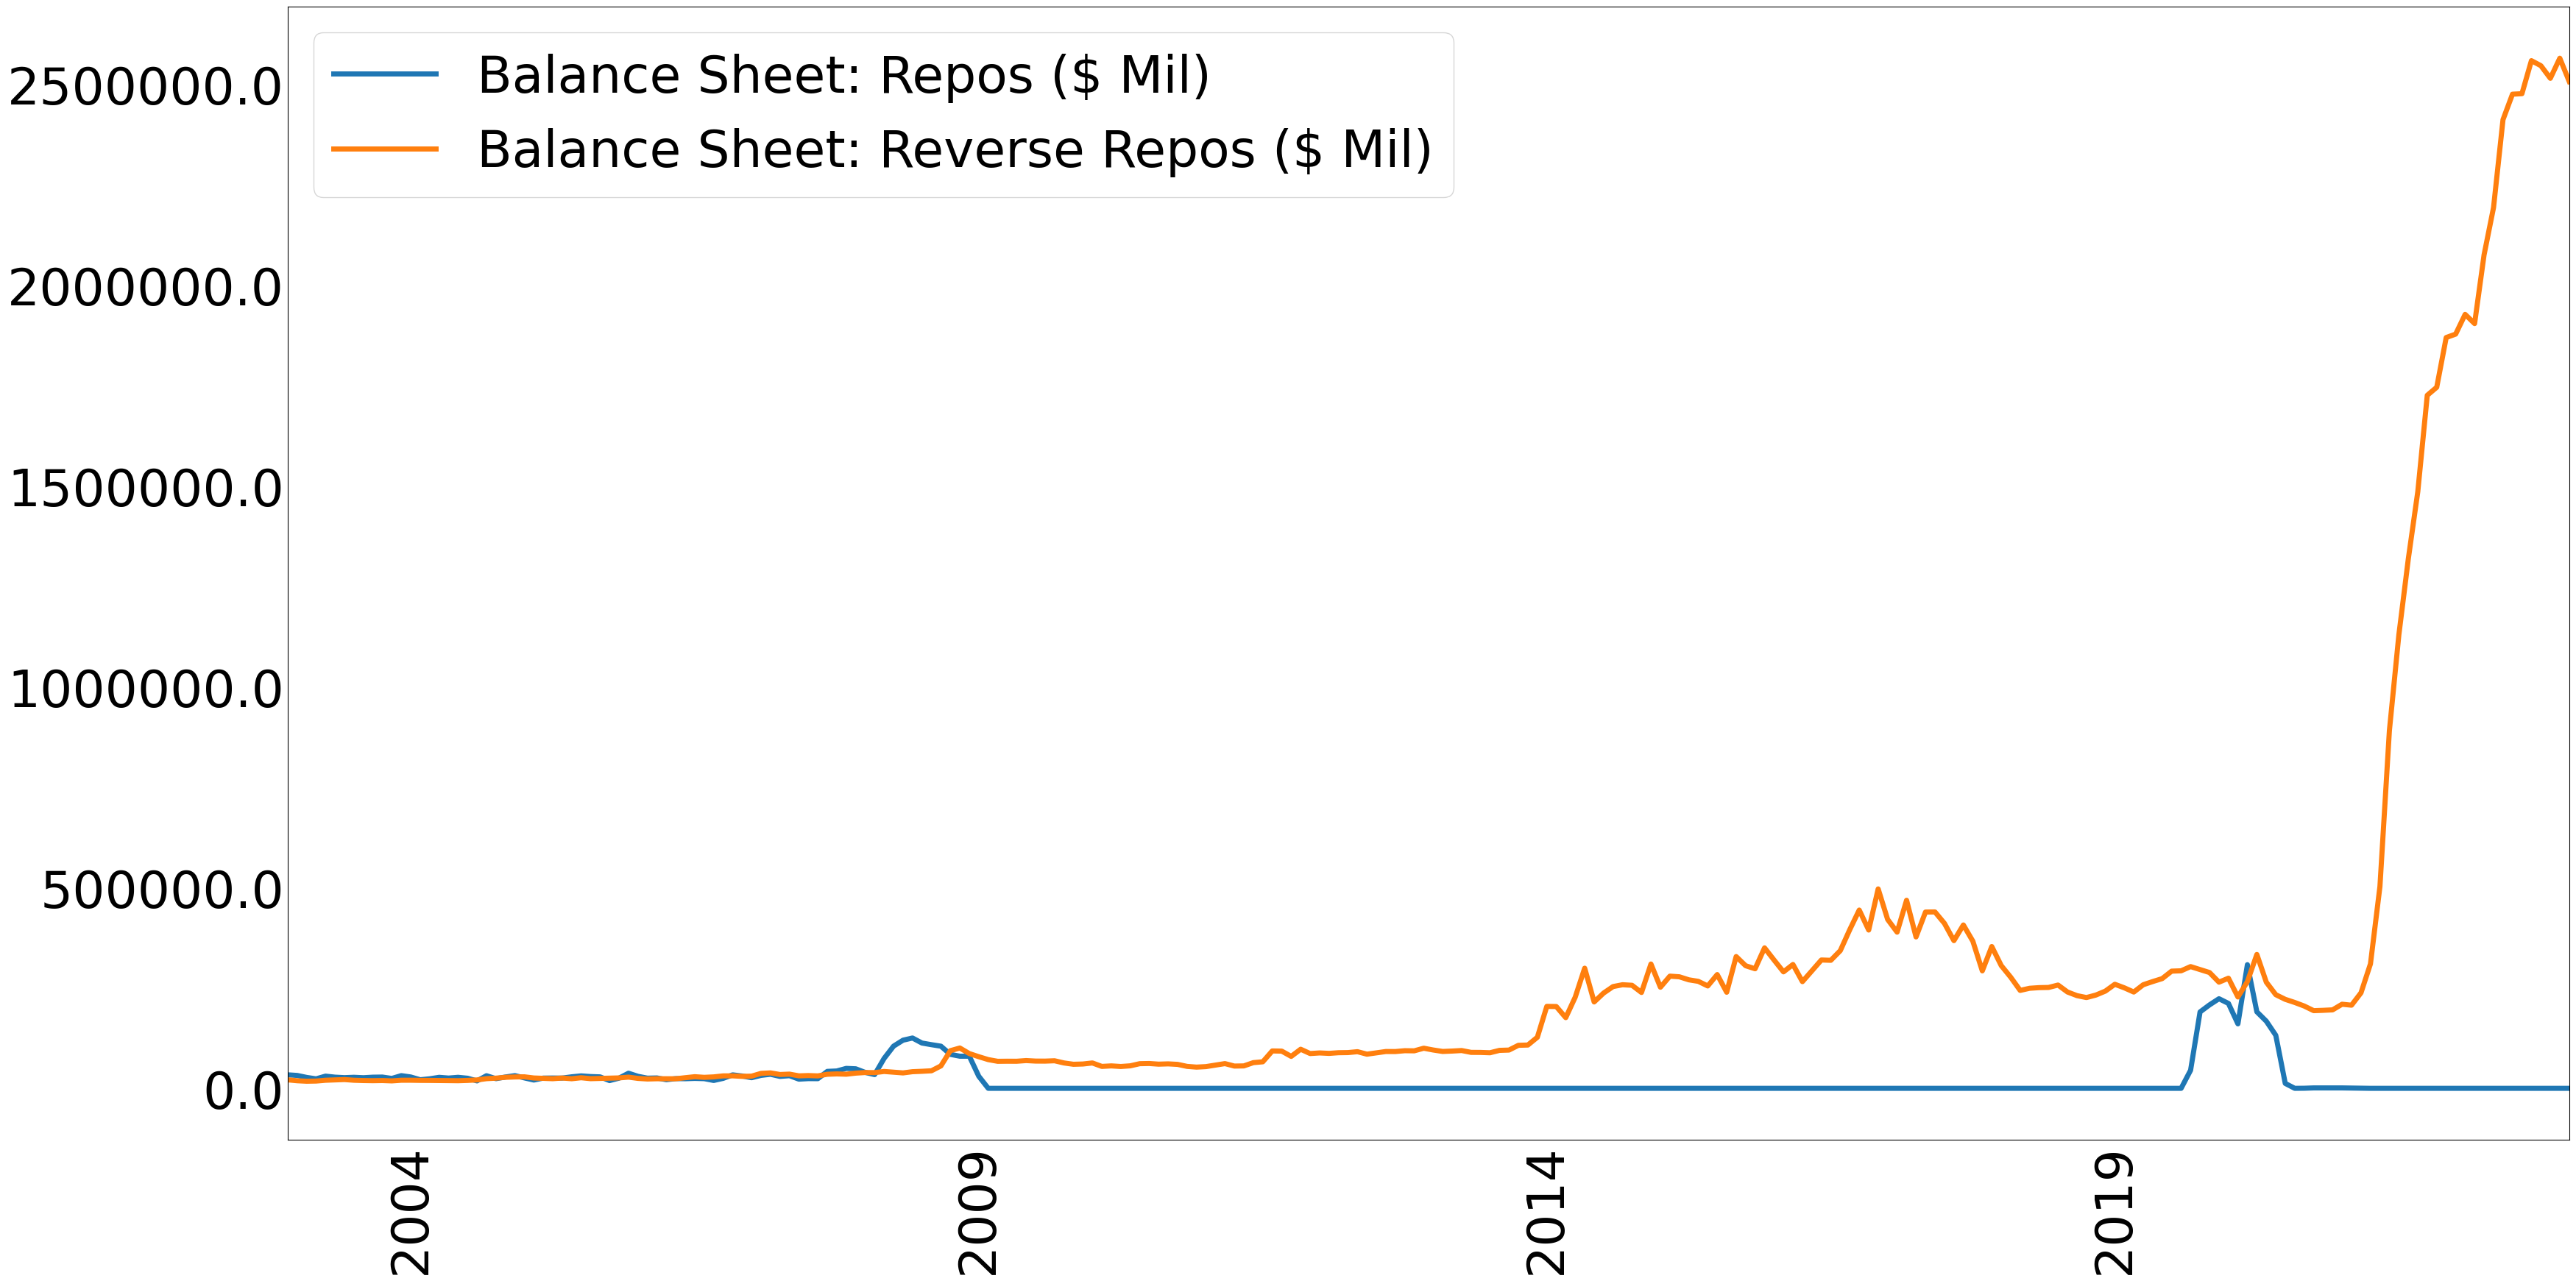

In [34]:
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)"]
plot_data = data[overnight_vars].dropna()
fig, ax = plot_lines(plot_data)

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


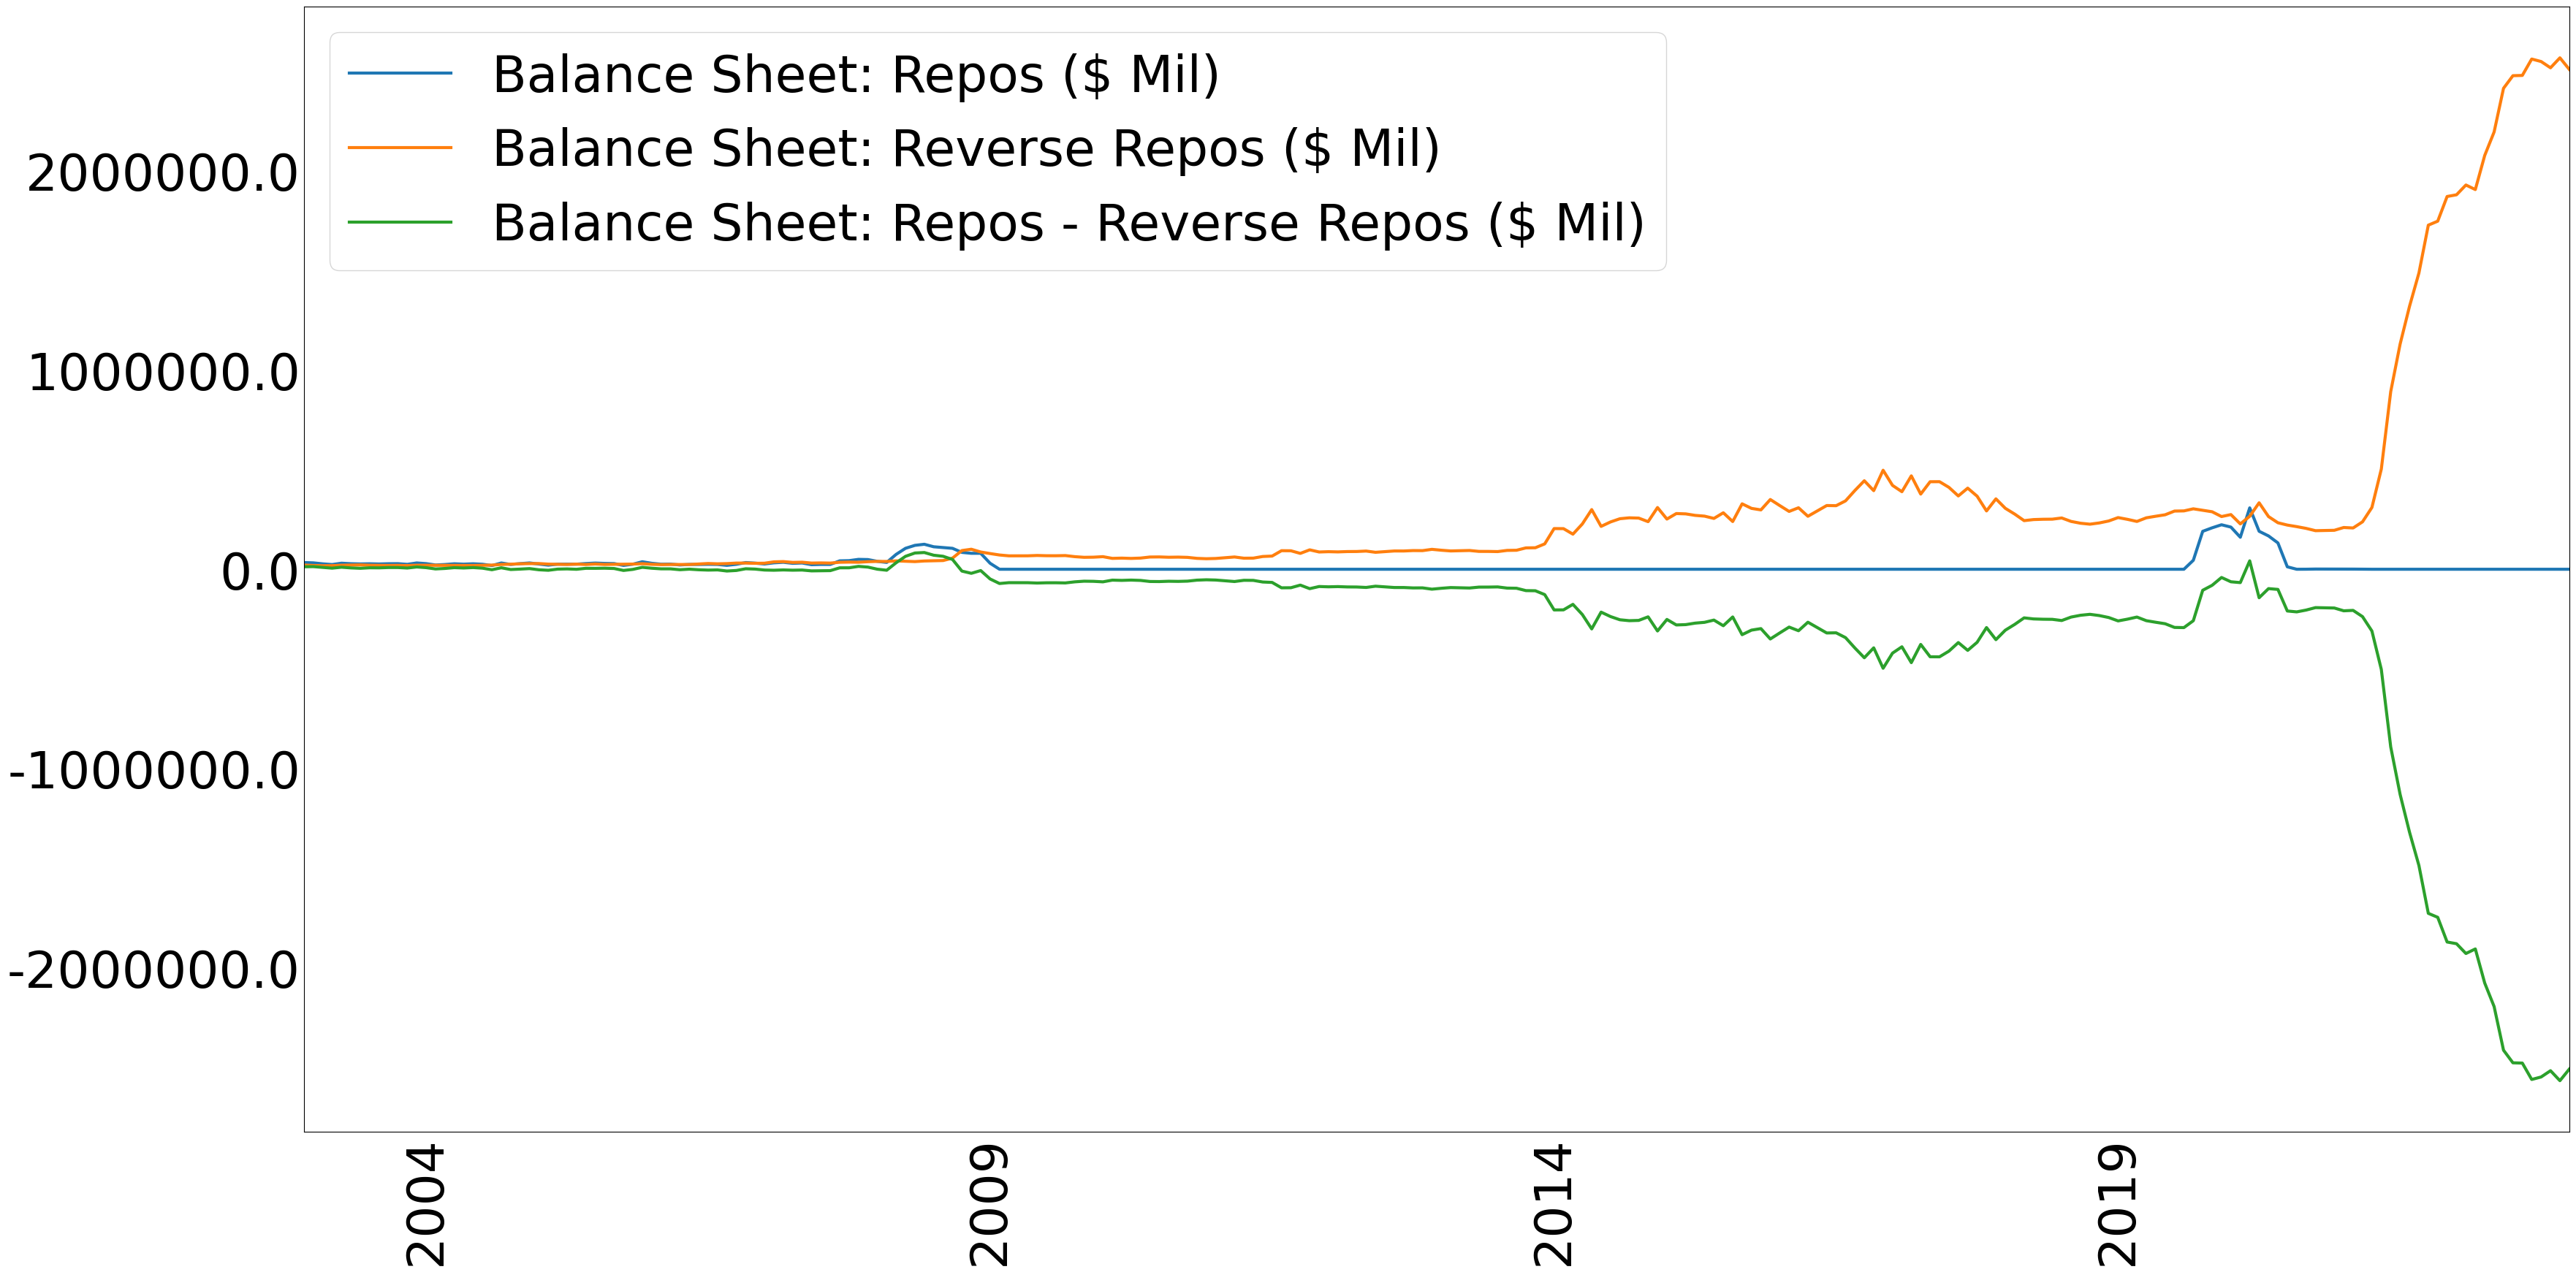

In [35]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

fig, ax = plot_lines(data[overnight_vars], linewidth = 3)

## Federal Funds Rate

C:\Users\hthog\AppData\Local\Temp\ipykernel_24144\1938982125.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


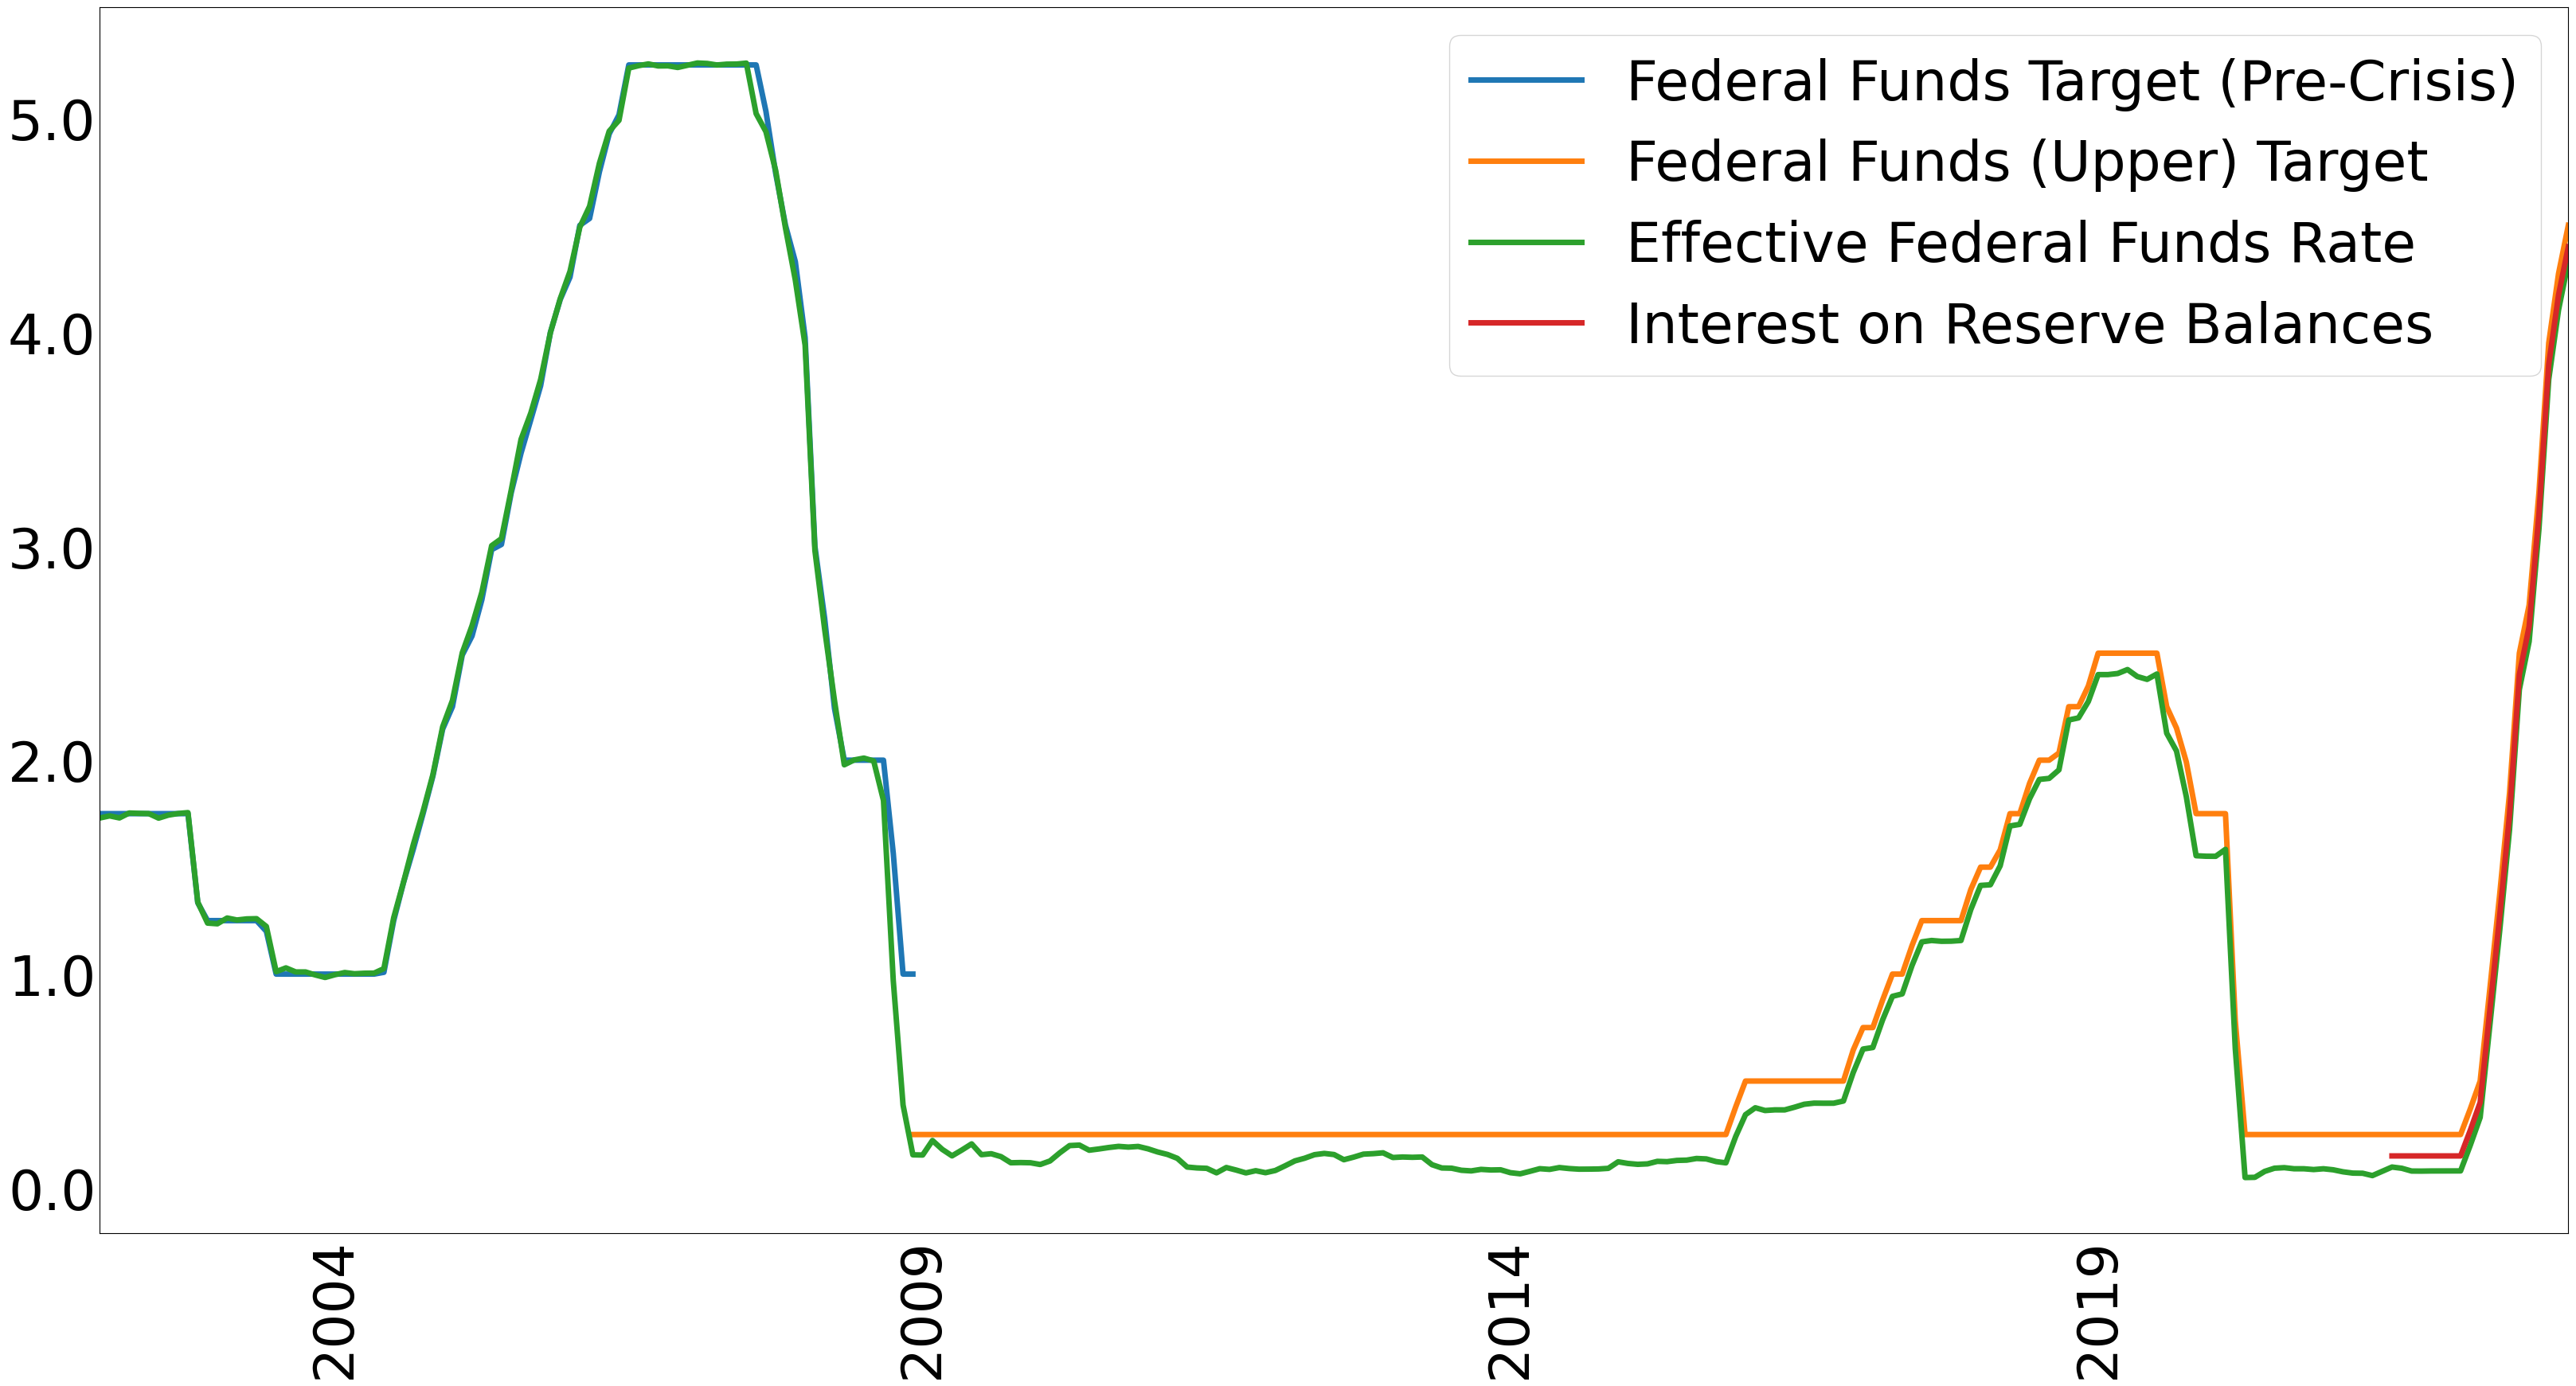

In [38]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Reserve Balances"]
plot_data = data[interest_vars]
fig, ax = plot_lines(plot_data, linewidth = 5)